In [101]:
%matplotlib inline

import pandas as pd
import matplotlib
import json
import matplotlib.pyplot as plt
import psycopg2
import textatistic
import networkx as nx
import seaborn as sbn
import requests
import plotly as py
import numpy as np
matplotlib.style.use('ggplot')
#print(py.__version__) #version 1.9.4 required
py.offline.init_notebook_mode() 

In [3]:
aisles = pd.read_csv('/home/faculty/millbr02/pub/ecomm/aisles.csv')
departments = pd.read_csv('/home/faculty/millbr02/pub/ecomm/departments.csv')
orders =  pd.read_csv('/home/faculty/millbr02/pub/ecomm/orders.csv')
products = pd.read_csv('/home/faculty/millbr02/pub/ecomm/products.csv')
op = pd.read_csv('/home/faculty/millbr02/pub/ecomm/order_products__train.csv')

In [4]:
op.merge(orders, on=['order_id']).merge(products).head()

order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1    816049       49302                  7          1    47901    train   
2   1242203       49302                  1          1     2993    train   
3   1383349       49302                 11          1    41425    train   
4   1787378       49302                  8          0   187205    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             4          4                 10                     9.0   
1            14          4                  6                    16.0   
2            15          0                  7                     7.0   
3             4          3                  8                    14.0   
4             5          4                 14                    30.0   

       product_name  aisle_id  department_id  
0  Bulgarian Yogurt       120             16  
1  Bulgarian Yogurt       120             16  
2  Bulgarian Yogurt       120             16  
3  Bulgarian Yogurt       120             16  
4  Bulgarian Yogurt       120             16

In [5]:
aco = op.groupby('order_id')['add_to_cart_order'].max()
aco = pd.DataFrame(aco)
aco = aco.reset_index()
aco.head()

order_id  add_to_cart_order
0         1                  8
1        36                  8
2        38                  9
3        96                  7
4        98                 49

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8e793e7b00>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f8e793fc4e0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8e793e7f60>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f8e793e79e8>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8e793fc240>}

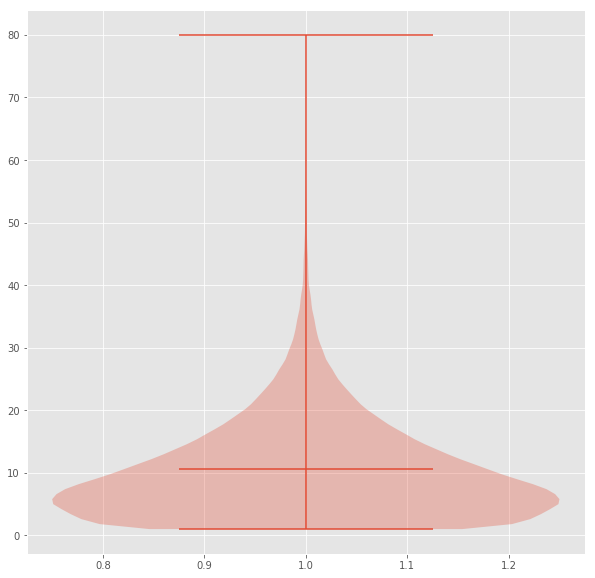

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

axes.violinplot(aco['add_to_cart_order'], showmeans=True, showmedians=False)

(array([  6.84500000e+03,   7.36800000e+03,   8.03300000e+03,
          8.21800000e+03,   0.00000000e+00,   8.89500000e+03,
          8.70800000e+03,   8.54100000e+03,   7.98300000e+03,
          0.00000000e+00,   7.21700000e+03,   6.55300000e+03,
          6.03400000e+03,   5.38300000e+03,   0.00000000e+00,
          4.84300000e+03,   4.39400000e+03,   3.83100000e+03,
          3.52200000e+03,   0.00000000e+00,   3.10800000e+03,
          2.71900000e+03,   2.47300000e+03,   0.00000000e+00,
          2.10200000e+03,   1.85700000e+03,   1.68100000e+03,
          1.46200000e+03,   0.00000000e+00,   1.29200000e+03,
          1.07900000e+03,   9.86000000e+02,   8.60000000e+02,
          0.00000000e+00,   6.79000000e+02,   6.34000000e+02,
          5.53000000e+02,   4.46000000e+02,   0.00000000e+00,
          4.03000000e+02,   3.46000000e+02,   3.15000000e+02,
          0.00000000e+00,   2.80000000e+02,   2.10000000e+02,
          1.93000000e+02,   1.78000000e+02,   0.00000000e+00,
        

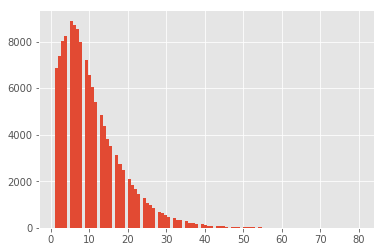

In [7]:
plt.hist(aco['add_to_cart_order'],bins=100)

In [8]:
t= pd.pivot_table(op[op.order_id<50], values=['add_to_cart_order'], index= 'order_id', columns= 'product_id')


In [9]:
t.iloc[1][t.iloc[1].notnull()]

                   product_id
add_to_cart_order  19660         2.0
                   34497         6.0
                   39612         1.0
                   43086         4.0
                   46620         5.0
                   46979         8.0
                   48679         7.0
                   49235         3.0
Name: 36, dtype: float64

In [10]:
t.head()

add_to_cart_order                                                  \
product_id             4461  10246 11109 11913 13176 18159 19660 21616 22035   
order_id                                                                       
1                        NaN   3.0   2.0   NaN   6.0   NaN   NaN   NaN   8.0   
36                       NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   
38                       3.0   NaN   NaN   1.0   NaN   2.0   NaN   4.0   NaN   

                  ...                                                         \
product_id 23622  ...  42625 43086 43633 46620 46979 47209 48679 49235 49302   
order_id          ...                                                          
1            NaN  ...    NaN   NaN   5.0   NaN   NaN   7.0   NaN   NaN   1.0   
36           NaN  ...    NaN   4.0   NaN   5.0   8.0   NaN   7.0   3.0   NaN   
38           5.0  ...    8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  
product_id 49683  
order_id          
1            4.0  
36           NaN  
38           NaN  

[3 rows x 25 columns]

In [11]:
#sm ={}
#aco.groups.keys()
#aco = op.groups('order_id')
#for i in aco.groups.keys():
#    if i<100:
#        print(i)
#        ptint(aco.get_group(i)['product_id'])

In [12]:
msk = np.random.rand(len(op))< .8
train = op[msk]
test = op[~msk]

In [13]:
print(len(train))
print(len(test))

1107802
276815


In [14]:
aco = train.groupby('order_id')
aco = test.groupby('order_id')

In [15]:
aco.get_group(36)

order_id  product_id  add_to_cart_order  reordered
8         36       39612                  1          0
9         36       19660                  2          1
12        36       46620                  5          1

In [16]:
unique_orderids = aco.groups.keys()

In [17]:
#item-item-matrix

In [18]:
%%time
iimat= {}
for oid in unique_orderids:
    for product1 in aco.get_group(oid)['product_id']:
        if int(product1) not in iimat:
            iimat[int(product1)] = {}
            for product2 in aco.get_group(oid)['product_id']:
                if product1 != product2:
                    iimat[int(product1)][int(product2)]= iimat[int(product1)].get(int(product2),0) +1

CPU times: user 50 s, sys: 600 ms, total: 50.6 s
Wall time: 50.2 s


In [19]:
%%time
msofar = 0
ones = 0
for key in iimat:
    for i in iimat[key]:
        if iimat[key][i] == 1:
            ones +=1
        if iimat[key][i] > msofar:
            print(key,i,msofar)

1 36472 0
1 42447 0
3 43122 0
3 42265 0
3 14650 0
3 5450 0
3 44910 0
3 25199 0
4 498 0
4 44486 0
4 18534 0
4 10151 0
4 8767 0
4 21133 0
4 4846 0
4 2015 0
8 22610 0
8 18659 0
8 2338 0
8 11463 0
9 16953 0
9 27746 0
10 33198 0
11 7898 0
11 24852 0
11 16797 0
11 14399 0
12 40910 0
12 17215 0
12 10501 0
12 21447 0
12 26655 0
12 24297 0
12 46779 0
12 36878 0
12 20031 0
13 36552 0
13 845 0
13 31589 0
15 48186 0
15 22035 0
23 31506 0
23 39275 0
23 47766 0
25 31506 0
25 31717 0
25 47734 0
25 21303 0
25 5818 0
25 19282 0
25 12845 0
25 21903 0
26 37520 0
26 104 0
26 5938 0
26 23477 0
26 46776 0
26 32748 0
26 31676 0
26 44847 0
27 31992 0
27 18321 0
28 8920 0
28 16826 0
28 101 0
28 24309 0
28 12341 0
30 26221 0
30 21711 0
30 3389 0
30 40261 0
31 30057 0
31 49683 0
31 46676 0
32 35045 0
34 19421 0
35 23236 0
36 38672 0
36 11645 0
36 222 0
37 260 0
37 13740 0
38 21553 0
38 22959 0
38 36475 0
38 32558 0
38 33041 0
40 20658 0
41 40723 0
41 14959 0
44 7346 0
45 22255 0
46 14680 0
46 24852 0
46 42652 0


668 24852 0
668 22963 0
669 18352 0
669 32755 0
671 21376 0
671 28458 0
671 24195 0
671 34 0
671 29118 0
673 36258 0
673 49139 0
673 24852 0
673 17462 0
673 48183 0
673 34024 0
679 18963 0
679 30021 0
679 41111 0
679 2922 0
679 5515 0
679 22845 0
685 41844 0
685 20734 0
685 13870 0
688 28571 0
688 15895 0
691 43249 0
691 781 0
691 27966 0
692 49007 0
692 6631 0
692 49319 0
692 35948 0
692 40910 0
692 23039 0
695 16714 0
695 11581 0
695 11613 0
697 11408 0
697 21010 0
697 17795 0
697 31717 0
697 21607 0
697 47209 0
699 27344 0
699 12916 0
699 18382 0
703 8571 0
704 14280 0
704 14680 0
704 27871 0
705 47766 0
709 6142 0
709 44471 0
711 13431 0
714 19924 0
714 23044 0
717 21457 0
717 42075 0
717 43047 0
723 28384 0
723 24097 0
723 46307 0
723 38586 0
723 40313 0
723 47130 0
723 21517 0
723 19213 0
724 35923 0
724 39275 0
724 44683 0
724 47626 0
724 44142 0
730 19145 0
730 22395 0
730 4605 0
733 35761 0
733 49114 0
735 32360 0
735 23692 0
737 42644 0
738 30169 0
738 37229 0
738 23313 0
740

1519 46347 0
1519 49517 0
1519 48351 0
1519 33295 0
1524 11075 0
1525 18134 0
1528 15200 0
1528 16419 0
1528 36085 0
1528 25275 0
1528 49164 0
1528 27645 0
1529 30480 0
1529 19049 0
1529 24852 0
1532 46800 0
1532 28473 0
1532 28384 0
1532 8744 0
1534 3765 0
1534 158 0
1535 46129 0
1536 13176 0
1536 2376 0
1536 35956 0
1538 49054 0
1538 4638 0
1539 47626 0
1540 35939 0
1541 34754 0
1541 29315 0
1541 723 0
1542 40208 0
1542 48205 0
1543 18633 0
1545 19443 0
1545 6069 0
1545 47738 0
1545 5322 0
1545 3661 0
1545 46229 0
1546 27104 0
1546 14678 0
1546 30489 0
1546 32701 0
1546 37646 0
1546 15567 0
1547 33489 0
1547 23554 0
1547 5876 0
1547 45413 0
1547 7559 0
1547 22141 0
1548 19734 0
1552 27595 0
1553 24053 0
1556 28902 0
1556 18670 0
1556 4605 0
1558 39275 0
1558 16797 0
1559 27090 0
1559 48594 0
1559 30391 0
1560 28481 0
1560 40571 0
1560 15269 0
1560 13755 0
1564 38400 0
1564 37213 0
1565 15203 0
1565 23734 0
1565 35976 0
1565 30170 0
1565 26555 0
1565 16797 0
1565 14862 0
1565 24703 0


2275 12752 0
2275 8274 0
2275 11576 0
2275 26620 0
2275 33018 0
2275 38444 0
2280 17398 0
2281 23341 0
2282 41329 0
2282 12060 0
2289 40348 0
2289 33452 0
2291 43954 0
2291 40316 0
2291 21501 0
2291 11014 0
2291 1823 0
2295 27881 0
2295 8518 0
2297 19202 0
2297 17596 0
2297 44765 0
2297 46575 0
2298 7952 0
2298 21137 0
2298 35842 0
2298 7715 0
2298 27695 0
2300 9176 0
2300 14114 0
2300 37082 0
2304 5785 0
2305 7628 0
2305 47883 0
2305 48364 0
2305 13733 0
2308 28931 0
2308 30771 0
2308 1485 0
2308 23262 0
2308 9623 0
2310 5876 0
2310 23645 0
2311 34 0
2312 19318 0
2312 21903 0
2314 24852 0
2314 45541 0
2316 7644 0
2316 11526 0
2316 47145 0
2316 43097 0
2316 43164 0
2316 37229 0
2316 34766 0
2316 47789 0
2319 36145 0
2320 38890 0
2320 2238 0
2321 1408 0
2321 42265 0
2321 25705 0
2322 33000 0
2322 29153 0
2322 7781 0
2322 42174 0
2322 45815 0
2323 7952 0
2323 9137 0
2323 29447 0
2323 13176 0
2323 10749 0
2323 21903 0
2326 30233 0
2326 24964 0
2326 40229 0
2326 21903 0
2327 26497 0
2327 2

2968 25495 0
2969 49667 0
2971 32854 0
2972 2240 0
2972 43072 0
2972 39427 0
2972 42372 0
2972 22021 0
2972 36651 0
2972 42240 0
2972 36239 0
2972 29136 0
2972 34827 0
2972 32403 0
2972 16933 0
2974 15424 0
2974 7736 0
2974 7243 0
2974 44085 0
2974 4920 0
2977 15424 0
2977 21497 0
2979 29474 0
2983 45066 0
2984 43440 0
2985 13984 0
2987 21795 0
2987 32573 0
2987 44487 0
2990 26943 0
2990 12943 0
2990 28134 0
2990 1463 0
2992 13176 0
2992 21914 0
2992 42987 0
2992 47868 0
2992 33462 0
2993 18362 0
2993 45013 0
2993 5769 0
2993 46650 0
2993 9594 0
2993 29226 0
2993 31717 0
2994 40233 0
2994 46906 0
2994 21137 0
2995 16759 0
2995 36441 0
2995 12471 0
2995 31513 0
2995 29598 0
2995 29599 0
2996 7631 0
2997 32643 0
2997 49054 0
2997 25575 0
2997 34631 0
2997 8670 0
2997 29487 0
2999 3339 0
2999 4799 0
3006 1185 0
3006 4941 0
3007 27521 0
3007 19893 0
3007 22967 0
3007 41065 0
3007 48679 0
3007 11629 0
3007 36717 0
3007 28985 0
3007 22677 0
3016 7503 0
3020 22210 0
3020 16797 0
3020 34134 0


3756 32402 0
3756 3283 0
3756 5380 0
3756 39275 0
3756 8012 0
3756 40706 0
3761 8193 0
3761 43867 0
3761 2707 0
3765 16906 0
3765 38228 0
3767 43913 0
3767 31614 0
3767 37825 0
3773 13292 0
3779 37067 0
3779 24764 0
3782 28196 0
3783 1529 0
3784 19488 0
3786 15785 0
3786 24235 0
3787 44514 0
3787 18027 0
3787 21334 0
3791 18696 0
3791 2985 0
3791 46906 0
3791 16525 0
3791 41950 0
3792 21288 0
3792 8961 0
3792 1787 0
3792 39276 0
3792 40279 0
3793 43352 0
3793 46802 0
3793 4799 0
3793 41463 0
3793 48487 0
3797 10561 0
3797 22767 0
3797 48171 0
3797 13966 0
3797 25783 0
3800 32689 0
3800 45290 0
3800 29301 0
3801 44233 0
3802 48099 0
3803 27747 0
3805 39984 0
3805 21137 0
3805 34358 0
3805 28535 0
3805 24120 0
3805 17948 0
3807 16665 0
3807 9178 0
3807 11115 0
3807 47766 0
3807 12409 0
3808 45656 0
3808 29553 0
3808 47946 0
3808 45066 0
3808 7736 0
3815 22000 0
3818 9689 0
3818 32004 0
3818 24852 0
3818 26644 0
3819 8088 0
3819 13829 0
3819 42318 0
3820 45259 0
3820 19348 0
3820 21709 0


4592 12916 0
4592 36070 0
4592 47191 0
4592 33198 0
4593 1516 0
4594 30233 0
4594 24852 0
4595 5459 0
4595 28836 0
4595 34662 0
4595 17670 0
4595 32553 0
4595 44245 0
4598 35504 0
4598 42441 0
4598 27903 0
4598 28412 0
4598 9133 0
4598 22559 0
4601 17898 0
4603 35649 0
4603 21938 0
4603 10574 0
4603 35750 0
4603 45303 0
4603 28985 0
4603 12714 0
4603 7911 0
4603 38141 0
4603 329 0
4603 10621 0
4605 4920 0
4605 25890 0
4606 1998 0
4606 37436 0
4606 365 0
4606 30334 0
4607 26209 0
4607 35042 0
4607 26436 0
4607 31702 0
4607 34449 0
4612 23375 0
4612 7156 0
4612 24852 0
4612 25738 0
4612 17339 0
4612 45933 0
4612 5679 0
4614 4698 0
4615 47144 0
4618 44008 0
4618 45137 0
4618 34530 0
4618 1939 0
4619 23405 0
4620 24685 0
4620 16230 0
4620 29078 0
4620 19895 0
4621 30352 0
4621 18427 0
4621 24852 0
4621 39174 0
4621 39719 0
4621 7641 0
4621 9787 0
4621 8764 0
4621 39275 0
4621 35727 0
4623 44692 0
4625 47193 0
4625 22402 0
4625 5559 0
4631 24184 0
4631 48301 0
4634 5194 0
4634 204 0
4635 38

5002 41534 0
5002 45077 0
5003 25008 0
5003 2530 0
5003 18019 0
5003 27943 0
5003 32264 0
5003 49354 0
5003 47727 0
5003 17008 0
5003 30356 0
5003 28916 0
5003 21687 0
5003 40825 0
5003 19836 0
5006 13176 0
5009 46227 0
5009 11895 0
5011 3696 0
5011 24097 0
5011 13740 0
5011 20169 0
5011 42972 0
5011 18987 0
5011 32108 0
5011 1069 0
5013 2968 0
5013 41273 0
5013 41651 0
5013 17928 0
5013 25495 0
5014 45368 0
5014 26209 0
5015 27705 0
5015 8414 0
5015 27966 0
5018 8536 0
5018 40136 0
5018 20514 0
5020 48988 0
5020 27951 0
5021 40490 0
5021 27757 0
5022 45106 0
5022 22534 0
5022 22825 0
5022 27900 0
5022 11597 0
5022 11629 0
5023 21849 0
5023 24004 0
5024 21938 0
5024 13829 0
5024 47766 0
5024 48679 0
5024 45066 0
5024 45007 0
5028 6510 0
5031 40545 0
5031 38164 0
5031 17553 0
5032 4889 0
5032 5818 0
5032 43219 0
5032 27092 0
5032 27937 0
5035 45066 0
5035 48442 0
5035 24964 0
5035 23165 0
5038 47626 0
5038 40810 0
5038 39821 0
5038 37654 0
5038 36189 0
5039 42240 0
5039 21265 0
5039 485

5456 21427 0
5456 31654 0
5456 23959 0
5457 13176 0
5457 32734 0
5457 21903 0
5459 4595 0
5459 28836 0
5459 34662 0
5459 17670 0
5459 32553 0
5459 44245 0
5460 17744 0
5460 13641 0
5460 47626 0
5460 3635 0
5460 32700 0
5463 26665 0
5463 36941 0
5463 24838 0
5465 15512 0
5465 18444 0
5465 15653 0
5465 45815 0
5466 43858 0
5466 24964 0
5467 5077 0
5467 23910 0
5467 47737 0
5467 21241 0
5467 18523 0
5467 11709 0
5472 10178 0
5472 30227 0
5472 34389 0
5472 19078 0
5474 44570 0
5474 22307 0
5474 24852 0
5474 25837 0
5477 27104 0
5477 38383 0
5479 6473 0
5479 10826 0
5484 2552 0
5484 24041 0
5484 20011 0
5484 14540 0
5484 46069 0
5485 616 0
5485 27629 0
5486 24400 0
5486 6410 0
5486 13866 0
5486 5389 0
5486 43319 0
5487 27363 0
5487 41588 0
5487 26949 0
5487 21174 0
5487 30391 0
5487 42585 0
5487 5450 0
5487 17530 0
5487 35629 0
5489 32689 0
5489 18580 0
5490 42035 0
5490 47532 0
5490 5077 0
5491 49235 0
5491 38772 0
5491 4920 0
5491 15290 0
5491 44765 0
5491 24830 0
5491 3661 0
5493 45007 0

5818 24184 0
5818 38236 0
5818 24852 0
5818 29941 0
5819 33651 0
5819 8572 0
5819 27551 0
5819 25438 0
5819 30183 0
5821 18465 0
5821 21500 0
5822 43632 0
5822 47569 0
5822 46402 0
5822 18886 0
5822 12505 0
5822 24747 0
5822 365 0
5822 40354 0
5825 45123 0
5825 9076 0
5825 8424 0
5825 43961 0
5825 26698 0
5825 6300 0
5825 42269 0
5825 11710 0
5826 47209 0
5834 2416 0
5834 14168 0
5834 29346 0
5834 45588 0
5834 37766 0
5839 23296 0
5844 42625 0
5844 4086 0
5845 45290 0
5845 17795 0
5845 2646 0
5848 47672 0
5848 14162 0
5848 3990 0
5848 22359 0
5853 43352 0
5853 33745 0
5853 21137 0
5854 3808 0
5854 5025 0
5854 38739 0
5854 15285 0
5854 47224 0
5854 46041 0
5854 4317 0
5854 9839 0
5855 1409 0
5855 46802 0
5856 33492 0
5858 1866 0
5858 44780 0
5859 11777 0
5859 6210 0
5859 6348 0
5859 8021 0
5859 14872 0
5859 39527 0
5859 24184 0
5859 30233 0
5859 5450 0
5859 48364 0
5859 42706 0
5860 30727 0
5860 38553 0
5860 28299 0
5860 49644 0
5860 28199 0
5862 27104 0
5862 21137 0
5862 49235 0
5862 3

6238 46667 0
6238 49484 0
6238 13598 0
6242 5819 0
6242 39142 0
6242 39719 0
6242 7450 0
6242 8955 0
6242 25804 0
6244 33065 0
6244 6058 0
6244 8955 0
6244 7513 0
6245 261 0
6246 2383 0
6246 3207 0
6246 29101 0
6246 41335 0
6247 41810 0
6247 44325 0
6247 47479 0
6247 10504 0
6247 17979 0
6247 16607 0
6248 13807 0
6249 26736 0
6249 46720 0
6249 43290 0
6249 148 0
6249 23541 0
6249 22825 0
6249 14218 0
6249 8986 0
6249 11068 0
6249 890 0
6249 43726 0
6251 43568 0
6251 46041 0
6251 37372 0
6251 7751 0
6252 41779 0
6252 32047 0
6256 8536 0
6256 23156 0
6258 23216 0
6258 24535 0
6260 31640 0
6260 35921 0
6261 32747 0
6261 196 0
6261 10053 0
6265 12427 0
6268 36946 0
6268 5077 0
6268 10070 0
6268 47766 0
6268 42495 0
6271 28597 0
6271 9157 0
6274 36321 0
6274 23011 0
6274 15860 0
6274 36086 0
6274 26503 0
6274 24852 0
6276 15480 0
6276 9913 0
6276 26882 0
6278 3808 0
6278 6704 0
6278 3885 0
6279 5025 0
6279 13780 0
6279 29487 0
6281 47185 0
6281 36810 0
6281 3431 0
6281 30661 0
6281 49007 0


6668 27796 0
6669 36640 0
6669 13176 0
6669 48697 0
6678 40348 0
6679 4347 0
6679 25371 0
6679 9196 0
6679 9421 0
6679 21903 0
6680 46650 0
6680 49683 0
6682 46720 0
6682 4562 0
6682 32293 0
6682 5782 0
6682 5161 0
6682 4138 0
6682 13740 0
6682 5597 0
6683 11520 0
6683 9040 0
6683 25332 0
6683 2966 0
6683 38553 0
6683 35004 0
6686 35458 0
6686 41372 0
6686 6142 0
6690 36854 0
6692 32035 0
6692 39877 0
6692 4163 0
6692 24253 0
6692 32869 0
6698 19155 0
6698 44319 0
6699 30353 0
6699 17122 0
6699 44566 0
6699 15057 0
6699 5819 0
6699 23580 0
6699 33357 0
6699 5710 0
6704 3808 0
6704 3885 0
6704 6278 0
6708 17122 0
6711 9085 0
6711 22790 0
6716 43781 0
6718 10673 0
6718 7412 0
6718 10895 0
6719 36724 0
6719 8277 0
6719 46665 0
6719 43961 0
6719 30391 0
6719 8174 0
6719 21903 0
6720 23405 0
6721 43258 0
6721 24893 0
6723 40028 0
6724 44129 0
6724 11563 0
6724 7969 0
6725 31102 0
6727 27360 0
6727 46697 0
6727 42562 0
6727 10341 0
6727 12743 0
6730 16953 0
6734 36216 0
6734 13083 0
6735 444

7113 16262 0
7113 35176 0
7113 1017 0
7113 29898 0
7113 26431 0
7113 45279 0
7114 8615 0
7114 41007 0
7116 49520 0
7116 21616 0
7116 14668 0
7116 43772 0
7116 3419 0
7116 36316 0
7116 20973 0
7117 9121 0
7117 40623 0
7117 20244 0
7117 32047 0
7118 34146 0
7118 7676 0
7118 42154 0
7118 49326 0
7120 14553 0
7120 48364 0
7120 42701 0
7120 13014 0
7120 9839 0
7121 8193 0
7121 30994 0
7121 35715 0
7121 26177 0
7121 30169 0
7121 17224 0
7121 19820 0
7121 47626 0
7121 26604 0
7121 13629 0
7123 4978 0
7123 29363 0
7123 13966 0
7123 25830 0
7123 18811 0
7123 15654 0
7123 5586 0
7123 47726 0
7123 7437 0
7125 4945 0
7125 32486 0
7126 15780 0
7126 20494 0
7128 47547 0
7128 9598 0
7130 2961 0
7130 26052 0
7131 10673 0
7131 9387 0
7135 46720 0
7135 19003 0
7135 14147 0
7136 11489 0
7138 25266 0
7138 10261 0
7138 23734 0
7138 43205 0
7138 39037 0
7138 47766 0
7138 29487 0
7140 47766 0
7141 15969 0
7141 196 0
7141 49558 0
7141 8519 0
7141 41544 0
7141 11471 0
7141 24852 0
7141 14421 0
7141 9366 0
7141

7518 42342 0
7518 25407 0
7519 49273 0
7519 25466 0
7520 14467 0
7520 28985 0
7520 21267 0
7520 47492 0
7520 12341 0
7521 32177 0
7521 11046 0
7522 2361 0
7522 45646 0
7522 10199 0
7528 44632 0
7528 14177 0
7528 18576 0
7528 45290 0
7528 29245 0
7530 27275 0
7530 10308 0
7530 16797 0
7530 25854 0
7530 46903 0
7533 44728 0
7533 44156 0
7538 30353 0
7538 42490 0
7539 30489 0
7539 41642 0
7539 1935 0
7542 46962 0
7544 48800 0
7544 43961 0
7544 21586 0
7544 8348 0
7544 28326 0
7546 6779 0
7546 36782 0
7546 8638 0
7554 27344 0
7557 28544 0
7557 34449 0
7557 26497 0
7557 32271 0
7558 20955 0
7559 26384 0
7559 18370 0
7559 5077 0
7560 49265 0
7560 5163 0
7560 25548 0
7560 25621 0
7561 27313 0
7561 38739 0
7561 34862 0
7561 24918 0
7561 31960 0
7561 34163 0
7561 7998 0
7561 43295 0
7562 49235 0
7564 12672 0
7564 39441 0
7564 43013 0
7564 31215 0
7564 5723 0
7564 48277 0
7567 31871 0
7567 48205 0
7567 44566 0
7567 42191 0
7569 11673 0
7569 23236 0
7569 28156 0
7569 33614 0
7570 34217 0
7571 267

7943 37391 0
7948 49113 0
7948 22274 0
7952 46572 0
7953 26848 0
7953 12916 0
7953 24852 0
7955 35163 0
7955 14063 0
7957 44225 0
7957 2581 0
7957 21709 0
7958 3480 0
7958 13802 0
7958 8174 0
7963 37766 0
7963 2966 0
7964 25513 0
7964 46684 0
7964 23407 0
7965 10132 0
7965 2086 0
7968 10737 0
7968 22955 0
7968 19025 0
7968 28199 0
7968 47915 0
7968 40943 0
7969 2326 0
7969 8518 0
7969 13176 0
7969 33370 0
7969 49451 0
7969 23693 0
7970 21019 0
7970 34474 0
7970 39275 0
7970 2717 0
7972 7877 0
7972 21375 0
7975 48797 0
7977 21288 0
7977 9890 0
7977 39275 0
7980 29106 0
7980 21508 0
7980 2966 0
7981 47209 0
7981 27966 0
7987 38928 0
7987 19565 0
7988 2361 0
7988 44359 0
7993 40396 0
7993 15613 0
7993 19966 0
7995 39380 0
7996 14129 0
7996 33746 0
7996 5373 0
7996 14678 0
7996 11198 0
7997 26648 0
7997 47144 0
7998 27313 0
7998 38739 0
7998 24918 0
7998 31960 0
7998 7561 0
7998 34163 0
7998 34862 0
7998 43295 0
7999 27360 0
7999 24097 0
7999 41068 0
7999 41273 0
7999 16234 0
7999 13755 0


8332 19604 0
8333 31872 0
8333 25985 0
8333 9076 0
8333 49098 0
8333 35948 0
8333 9422 0
8333 10863 0
8333 46868 0
8333 35221 0
8333 39929 0
8333 33690 0
8333 35004 0
8334 22369 0
8334 8555 0
8334 24933 0
8334 5825 0
8334 5785 0
8334 9897 0
8334 15655 0
8334 44219 0
8334 44593 0
8334 47877 0
8339 37687 0
8340 28204 0
8342 877 0
8342 29429 0
8344 4369 0
8344 32538 0
8344 27819 0
8345 13936 0
8345 25393 0
8345 27796 0
8345 20021 0
8345 44901 0
8345 40168 0
8345 4058 0
8345 48171 0
8345 12044 0
8345 47903 0
8347 2528 0
8347 11520 0
8347 1939 0
8347 11286 0
8347 35094 0
8347 44477 0
8347 13221 0
8348 48800 0
8348 43961 0
8348 21586 0
8348 7544 0
8348 28326 0
8349 42585 0
8349 47766 0
8349 45007 0
8351 8193 0
8351 5818 0
8351 29346 0
8351 37247 0
8352 1120 0
8352 43812 0
8356 27796 0
8356 21724 0
8356 10957 0
8356 29471 0
8357 34360 0
8357 40706 0
8357 25466 0
8357 14114 0
8357 8390 0
8358 28928 0
8358 24009 0
8358 32537 0
8358 28058 0
8358 43355 0
8358 6286 0
8359 21137 0
8359 45948 0
8359

8758 13176 0
8758 34401 0
8758 15902 0
8761 39249 0
8761 24981 0
8761 34321 0
8761 4920 0
8761 49098 0
8761 19678 0
8762 27681 0
8762 42426 0
8763 28993 0
8763 30274 0
8763 5460 0
8763 7781 0
8764 31217 0
8764 43474 0
8764 28204 0
8764 24186 0
8764 15804 0
8764 19516 0
8764 17518 0
8767 38456 0
8767 10145 0
8767 24890 0
8773 8424 0
8773 46906 0
8773 16387 0
8773 28326 0
8774 38689 0
8774 20600 0
8774 8239 0
8774 16797 0
8774 5134 0
8774 3896 0
8775 47626 0
8775 48628 0
8776 29968 0
8776 42569 0
8776 5212 0
8776 4522 0
8776 39803 0
8776 12140 0
8776 31743 0
8781 43504 0
8781 39275 0
8781 41406 0
8788 5785 0
8788 30686 0
8789 6101 0
8789 5782 0
8790 31893 0
8790 34126 0
8791 39275 0
8791 26309 0
8791 21903 0
8792 35140 0
8792 5785 0
8792 9076 0
8792 17878 0
8792 36735 0
8793 45321 0
8793 35766 0
8793 5089 0
8796 17616 0
8796 42625 0
8796 32467 0
8796 25676 0
8796 40825 0
8797 4920 0
8797 25852 0
8799 13176 0
8799 29628 0
8799 40772 0
8799 14901 0
8800 1217 0
8800 41602 0
8800 260 0
8800 

9164 24852 0
9164 4605 0
9164 26839 0
9166 26922 0
9170 30371 0
9170 23723 0
9170 12606 0
9170 23341 0
9171 12312 0
9171 45066 0
9171 13292 0
9171 34157 0
9171 781 0
9172 9808 0
9172 8912 0
9172 37141 0
9172 35991 0
9172 47209 0
9172 38795 0
9172 21775 0
9175 19474 0
9175 38739 0
9175 15396 0
9175 31654 0
9175 19878 0
9175 16553 0
9175 19660 0
9175 33493 0
9176 17338 0
9176 1940 0
9176 7469 0
9176 43190 0
9176 5535 0
9177 26209 0
9177 24852 0
9177 28590 0
9177 46584 0
9177 42356 0
9177 49006 0
9177 21903 0
9178 13196 0
9178 35198 0
9178 33198 0
9178 27847 0
9182 47011 0
9182 43406 0
9182 29686 0
9182 11143 0
9182 32611 0
9182 33731 0
9185 35921 0
9185 37646 0
9185 12757 0
9185 23288 0
9185 38890 0
9185 27086 0
9187 40261 0
9188 3616 0
9188 9875 0
9188 47940 0
9188 25077 0
9188 1080 0
9188 48762 0
9188 2413 0
9191 11121 0
9191 34540 0
9191 48469 0
9191 4469 0
9194 21137 0
9194 35352 0
9194 24118 0
9194 9463 0
9194 16616 0
9194 30746 0
9194 44413 0
9194 30382 0
9194 27663 0
9196 6679 0
9

9587 8174 0
9587 16927 0
9590 39858 0
9590 31717 0
9590 8006 0
9590 43928 0
9590 39993 0
9590 44142 0
9593 46026 0
9593 27629 0
9594 2993 0
9594 18362 0
9594 45013 0
9594 5769 0
9594 29226 0
9594 46650 0
9594 31717 0
9595 14211 0
9595 10132 0
9595 3896 0
9595 5450 0
9595 9515 0
9595 33731 0
9597 46979 0
9597 6046 0
9597 29334 0
9598 1443 0
9598 16885 0
9598 13176 0
9598 17723 0
9598 43643 0
9598 27596 0
9601 43352 0
9604 47626 0
9604 6287 0
9605 39275 0
9616 28900 0
9616 31406 0
9616 287 0
9618 21560 0
9618 10246 0
9619 40884 0
9621 21137 0
9621 49026 0
9623 21137 0
9623 5450 0
9623 22007 0
9626 42220 0
9626 34702 0
9626 7358 0
9628 13998 0
9631 8025 0
9634 15891 0
9634 8424 0
9634 12218 0
9634 33651 0
9634 27196 0
9634 6286 0
9637 12384 0
9637 30720 0
9637 8021 0
9637 30391 0
9637 14347 0
9637 5212 0
9637 17183 0
9638 7736 0
9638 48833 0
9638 41301 0
9638 8479 0
9641 24400 0
9641 36365 0
9644 6184 0
9644 13176 0
9644 4724 0
9647 4163 0
9647 10070 0
9647 10279 0
9647 32200 0
9647 18987

10014 31683 0
10014 30589 0
10014 27093 0
10016 3988 0
10017 37250 0
10017 19660 0
10025 11688 0
10025 33513 0
10027 11992 0
10027 30949 0
10027 26165 0
10027 37646 0
10027 38557 0
10029 38985 0
10029 40022 0
10030 5212 0
10030 6935 0
10031 24852 0
10031 21206 0
10031 6647 0
10032 41276 0
10033 19376 0
10033 46616 0
10033 42741 0
10035 13176 0
10035 26242 0
10036 10644 0
10036 39346 0
10036 23236 0
10036 12020 0
10036 41375 0
10038 432 0
10038 13974 0
10038 8153 0
10038 48634 0
10038 48299 0
10038 28221 0
10043 44449 0
10043 35986 0
10043 43908 0
10043 19048 0
10043 42356 0
10043 42699 0
10043 23165 0
10043 33438 0
10048 6046 0
10048 22959 0
10049 39922 0
10049 33894 0
10050 28842 0
10050 22476 0
10050 38318 0
10050 25918 0
10054 3856 0
10054 43772 0
10054 41674 0
10054 24852 0
10054 4920 0
10055 22000 0
10055 49267 0
10055 29439 0
10057 47626 0
10057 2295 0
10059 28849 0
10059 48205 0
10059 21137 0
10060 46720 0
10060 8193 0
10060 24852 0
10060 20549 0
10060 44632 0
10060 8580 0
10060

10439 776 0
10439 40203 0
10439 10734 0
10439 29439 0
10442 3020 0
10442 46820 0
10445 6369 0
10447 33080 0
10447 29668 0
10447 17461 0
10447 34126 0
10448 37203 0
10448 30483 0
10448 26604 0
10453 43857 0
10453 20738 0
10453 6227 0
10453 30776 0
10453 6410 0
10453 48684 0
10455 35504 0
10455 33543 0
10455 10312 0
10455 26283 0
10455 4799 0
10455 33279 0
10460 48144 0
10460 41665 0
10460 29307 0
10460 16797 0
10460 1587 0
10461 2054 0
10465 19697 0
10465 35786 0
10467 7649 0
10467 45757 0
10467 36550 0
10468 27104 0
10468 29681 0
10468 7778 0
10468 21286 0
10468 44008 0
10468 14553 0
10468 27275 0
10468 12508 0
10468 26312 0
10469 28100 0
10469 24852 0
10469 37141 0
10475 5184 0
10475 10768 0
10475 48628 0
10475 3957 0
10475 12456 0
10475 3952 0
10475 39877 0
10475 42085 0
10476 35633 0
10478 12392 0
10478 28465 0
10478 23499 0
10478 28647 0
10478 24799 0
10479 38185 0
10479 45394 0
10479 13950 0
10481 24385 0
10481 18353 0
10483 4673 0
10483 39491 0
10483 20772 0
10483 12993 0
10483 4

10831 30391 0
10831 6188 0
10831 9666 0
10831 44910 0
10831 35951 0
10831 32018 0
10831 45495 0
10832 2682 0
10833 32285 0
10833 39773 0
10834 7346 0
10834 49026 0
10834 9422 0
10835 16768 0
10835 35042 0
10835 8867 0
10835 15123 0
10835 20345 0
10835 47050 0
10835 1835 0
10840 49564 0
10840 25362 0
10840 30340 0
10848 13176 0
10849 25588 0
10849 9534 0
10851 35762 0
10851 38739 0
10851 46979 0
10851 35221 0
10851 47865 0
10851 47626 0
10851 26348 0
10853 15860 0
10854 31464 0
10854 27243 0
10855 44632 0
10855 28985 0
10855 10017 0
10859 40268 0
10859 5785 0
10859 7500 0
10860 23313 0
10860 23644 0
10860 14401 0
10862 17949 0
10862 13198 0
10862 8518 0
10862 48679 0
10863 18660 0
10863 30135 0
10863 11945 0
10863 9881 0
10863 40427 0
10863 44201 0
10864 49520 0
10864 17166 0
10866 26096 0
10866 13712 0
10866 27571 0
10866 18454 0
10867 47766 0
10869 49027 0
10869 20973 0
10872 44882 0
10872 29987 0
10872 2452 0
10872 26790 0
10872 33754 0
10872 42828 0
10872 42110 0
10874 17600 0
10874

11256 24838 0
11256 42959 0
11258 14211 0
11258 9076 0
11258 7781 0
11258 21927 0
11258 22474 0
11258 35004 0
11258 43565 0
11258 3951 0
11259 30146 0
11259 40278 0
11262 14536 0
11262 11422 0
11262 12702 0
11265 20738 0
11266 22963 0
11266 24852 0
11266 27845 0
11270 19057 0
11270 36709 0
11270 34262 0
11270 43961 0
11276 41544 0
11276 45007 0
11276 25439 0
11278 11488 0
11278 19468 0
11279 49513 0
11279 16797 0
11281 6016 0
11281 10737 0
11281 31299 0
11281 34862 0
11281 8811 0
11286 39128 0
11286 31041 0
11286 30382 0
11286 37478 0
11292 1160 0
11292 8953 0
11292 25146 0
11292 48278 0
11295 48219 0
11295 19613 0
11295 27845 0
11298 429 0
11298 34582 0
11299 29307 0
11299 16349 0
11299 46654 0
11300 47144 0
11300 42289 0
11300 49683 0
11301 5769 0
11301 41690 0
11301 4367 0
11302 13304 0
11302 31717 0
11302 42585 0
11302 20152 0
11302 12089 0
11302 7500 0
11302 38510 0
11302 22677 0
11303 16965 0
11303 44142 0
11305 31744 0
11305 19731 0
11306 28511 0
11306 16823 0
11307 17794 0
1130

11722 35221 0
11724 4210 0
11727 33354 0
11727 2435 0
11727 33163 0
11729 24440 0
11729 12409 0
11729 23375 0
11732 48144 0
11732 19910 0
11737 10768 0
11737 44625 0
11737 14371 0
11737 20900 0
11737 8615 0
11737 13517 0
11738 31506 0
11739 8968 0
11739 4698 0
11739 1463 0
11739 33543 0
11740 36618 0
11740 16759 0
11741 10017 0
11741 12467 0
11741 8012 0
11741 47766 0
11742 43568 0
11742 32033 0
11742 1762 0
11742 18019 0
11742 2091 0
11742 7468 0
11744 35208 0
11744 15697 0
11744 36082 0
11744 20947 0
11744 26701 0
11745 39327 0
11745 47324 0
11745 30095 0
11748 10957 0
11749 35600 0
11749 33129 0
11749 49340 0
11750 11422 0
11755 26054 0
11756 7912 0
11757 19966 0
11757 42803 0
11757 48821 0
11757 5575 0
11757 13852 0
11757 38383 0
11757 26620 0
11757 19821 0
11757 37374 0
11757 20015 0
11759 8953 0
11759 5258 0
11759 35395 0
11759 4557 0
11760 21137 0
11760 47626 0
11760 38266 0
11760 31126 0
11760 10017 0
11761 8518 0
11761 36695 0
11762 38544 0
11762 9741 0
11762 13263 0
11764 359

12155 16185 0
12155 165 0
12157 7736 0
12157 15290 0
12157 28691 0
12157 6589 0
12157 45118 0
12159 24852 0
12159 5782 0
12159 43742 0
12162 26096 0
12162 9076 0
12163 11777 0
12163 47766 0
12165 47943 0
12167 43744 0
12167 20705 0
12167 41844 0
12167 8153 0
12167 9387 0
12167 42766 0
12169 21417 0
12169 38129 0
12170 37496 0
12170 19006 0
12174 31960 0
12174 3262 0
12174 44319 0
12180 22397 0
12180 8518 0
12183 37460 0
12183 45815 0
12183 27129 0
12183 14858 0
12183 8590 0
12183 32271 0
12186 8728 0
12186 5450 0
12186 46676 0
12186 15290 0
12187 546 0
12187 15386 0
12187 15290 0
12191 38584 0
12193 24852 0
12193 28199 0
12196 33463 0
12199 7963 0
12199 36070 0
12199 32265 0
12199 9866 0
12199 35883 0
12199 16349 0
12202 36071 0
12204 47209 0
12204 27966 0
12209 6944 0
12209 41408 0
12209 36618 0
12209 34262 0
12211 27344 0
12218 21512 0
12218 13955 0
12218 17252 0
12218 9199 0
12219 48997 0
12219 14399 0
12220 25476 0
12220 24852 0
12220 34969 0
12223 43352 0
12224 23098 0
12224 19604

12614 5646 0
12614 30967 0
12615 39170 0
12615 10603 0
12615 21903 0
12616 21616 0
12616 21137 0
12616 40706 0
12616 8277 0
12616 6182 0
12616 41177 0
12616 35918 0
12618 2664 0
12618 43512 0
12618 49026 0
12620 26900 0
12620 27796 0
12620 48697 0
12621 28281 0
12622 5337 0
12622 17794 0
12622 37067 0
12622 10246 0
12623 7224 0
12623 18394 0
12623 5819 0
12623 23 0
12624 13984 0
12624 24184 0
12625 1240 0
12625 21614 0
12625 24062 0
12626 45061 0
12630 18362 0
12630 2564 0
12630 44590 0
12630 6686 0
12632 33138 0
12632 31018 0
12632 49622 0
12632 47903 0
12634 12916 0
12637 47931 0
12637 27307 0
12637 28031 0
12638 42736 0
12638 26209 0
12638 41570 0
12638 42244 0
12638 18503 0
12640 7862 0
12642 16745 0
12642 16754 0
12642 33075 0
12642 6309 0
12644 22935 0
12656 20865 0
12659 23952 0
12659 46962 0
12659 44116 0
12659 38374 0
12659 39462 0
12659 28535 0
12659 13176 0
12659 36746 0
12659 43122 0
12663 23497 0
12663 39922 0
12663 10710 0
12663 24343 0
12664 20542 0
12665 7736 0
12665 38

12995 4658 0
12995 45448 0
12995 14633 0
12995 39762 0
12995 7503 0
13004 2295 0
13005 12955 0
13005 2855 0
13008 17484 0
13008 6606 0
13009 241 0
13009 39844 0
13009 196 0
13009 23965 0
13009 31343 0
13011 27240 0
13011 18201 0
13011 12911 0
13012 18337 0
13012 1090 0
13012 5785 0
13013 21137 0
13013 31506 0
13013 8627 0
13013 28286 0
13013 4421 0
13013 5134 0
13013 7781 0
13014 34969 0
13014 24830 0
13014 21137 0
13016 46900 0
13016 30620 0
13016 48805 0
13016 7622 0
13017 21096 0
13017 18465 0
13017 29798 0
13017 22935 0
13018 37606 0
13018 44201 0
13018 42508 0
13018 11182 0
13018 6383 0
13018 34834 0
13018 5748 0
13018 45487 0
13018 36534 0
13018 4121 0
13018 16953 0
13018 40332 0
13018 41787 0
13021 47000 0
13021 26209 0
13021 47890 0
13021 9076 0
13023 9000 0
13023 8216 0
13023 21903 0
13024 48697 0
13024 23020 0
13024 20381 0
13025 1349 0
13025 43093 0
13025 47319 0
13026 10690 0
13026 18418 0
13026 12919 0
13027 49416 0
13027 19022 0
13029 5025 0
13029 21333 0
13029 18439 0
13

13428 47823 0
13430 35042 0
13431 44449 0
13431 37220 0
13431 34126 0
13435 9238 0
13440 15816 0
13440 35989 0
13440 7503 0
13441 33168 0
13441 5025 0
13441 41844 0
13441 9510 0
13444 39993 0
13444 30233 0
13446 17616 0
13446 14161 0
13446 5122 0
13446 16965 0
13446 31343 0
13447 31640 0
13447 31506 0
13447 40723 0
13447 46755 0
13447 13176 0
13447 33401 0
13447 28458 0
13449 29292 0
13449 42450 0
13449 13779 0
13449 28628 0
13449 30391 0
13449 35364 0
13449 28924 0
13449 21917 0
13449 24830 0
13451 12145 0
13451 40530 0
13451 47155 0
13451 45364 0
13451 23094 0
13452 12419 0
13452 300 0
13452 8021 0
13452 48679 0
13453 35140 0
13453 45633 0
13453 22260 0
13453 38159 0
13455 40706 0
13455 22963 0
13455 4932 0
13455 30391 0
13455 9666 0
13455 38766 0
13455 23375 0
13457 18963 0
13457 5876 0
13457 36389 0
13457 459 0
13457 15763 0
13457 49131 0
13462 10032 0
13462 4210 0
13470 26604 0
13471 49113 0
13471 2086 0
13471 36606 0
13471 8591 0
13475 10312 0
13479 17616 0
13479 41653 0
13479 16

13822 25668 0
13822 49141 0
13822 36695 0
13822 13176 0
13822 1614 0
13823 38817 0
13823 16797 0
13823 33129 0
13825 24908 0
13826 43961 0
13826 1409 0
13826 13870 0
13826 19559 0
13827 35682 0
13828 226 0
13828 44843 0
13828 23375 0
13829 8088 0
13829 3819 0
13829 42318 0
13834 12845 0
13839 5819 0
13840 33067 0
13840 46955 0
13840 35749 0
13841 13203 0
13844 12779 0
13844 44580 0
13844 20599 0
13848 29664 0
13848 25601 0
13848 19734 0
13848 38563 0
13848 34550 0
13848 11686 0
13848 27395 0
13848 26489 0
13848 14795 0
13848 30669 0
13851 34249 0
13851 39850 0
13851 41006 0
13851 45679 0
13851 4809 0
13851 47766 0
13851 39561 0
13851 33401 0
13851 28058 0
13851 13083 0
13851 13852 0
13851 17630 0
13851 21567 0
13852 21137 0
13852 28715 0
13852 14947 0
13852 24852 0
13852 22935 0
13853 19057 0
13853 11250 0
13853 49235 0
13853 17652 0
13853 17461 0
13853 36011 0
13853 12029 0
13855 20738 0
13855 24852 0
13858 21616 0
13858 20114 0
13858 30391 0
13858 47788 0
13858 45007 0
13860 32240 0


14214 14999 0
14214 44632 0
14214 47329 0
14214 48524 0
14218 5189 0
14218 1511 0
14221 44008 0
14221 6652 0
14221 49374 0
14223 41184 0
14223 10673 0
14223 43523 0
14223 12902 0
14223 7799 0
14223 3177 0
14223 40332 0
14223 8013 0
14225 20169 0
14225 27750 0
14228 36393 0
14228 5077 0
14230 4137 0
14235 13176 0
14235 37646 0
14238 45656 0
14238 4443 0
14238 21484 0
14238 10613 0
14238 7478 0
14239 21265 0
14239 28835 0
14239 41787 0
14239 28221 0
14239 32478 0
14239 32605 0
14242 31066 0
14242 45246 0
14252 42208 0
14258 24313 0
14258 970 0
14258 48697 0
14265 16816 0
14265 5089 0
14265 14365 0
14265 45054 0
14267 27104 0
14267 16797 0
14267 18581 0
14268 25544 0
14268 17794 0
14268 46023 0
14268 46088 0
14268 26985 0
14268 49306 0
14268 33819 0
14268 35948 0
14268 9901 0
14268 43262 0
14269 44632 0
14269 8277 0
14270 18362 0
14270 43116 0
14270 17341 0
14270 18534 0
14270 21333 0
14271 36866 0
14272 40208 0
14272 38288 0
14272 25544 0
14272 16168 0
14273 32160 0
14273 6686 0
14277 71

14634 45979 0
14634 28634 0
14634 18622 0
14634 13087 0
14636 47865 0
14636 3318 0
14636 43263 0
14638 812 0
14638 24852 0
14639 17874 0
14639 42300 0
14642 12036 0
14643 3952 0
14643 40706 0
14643 48220 0
14643 5450 0
14643 20007 0
14645 29628 0
14645 44142 0
14645 49030 0
14647 39693 0
14649 20116 0
14649 40877 0
14649 17183 0
14650 39928 0
14650 26497 0
14650 16083 0
14650 14678 0
14650 29675 0
14651 38400 0
14651 22035 0
14651 27156 0
14651 28373 0
14652 39984 0
14652 5876 0
14652 22326 0
14652 8518 0
14652 3880 0
14652 3740 0
14658 5011 0
14658 13988 0
14658 38647 0
14658 4920 0
14658 47209 0
14658 12779 0
14658 782 0
14659 27240 0
14660 41950 0
14660 9839 0
14664 13176 0
14664 40706 0
14664 12250 0
14664 48109 0
14667 20728 0
14667 2408 0
14667 24636 0
14667 29735 0
14668 49520 0
14668 21616 0
14668 7116 0
14668 43772 0
14668 3419 0
14668 36316 0
14668 20973 0
14669 13225 0
14669 39035 0
14669 21709 0
14671 27104 0
14671 8587 0
14671 28427 0
14671 12013 0
14671 34523 0
14673 2513

15003 28993 0
15005 6193 0
15005 7781 0
15005 21927 0
15005 44439 0
15005 26209 0
15005 24830 0
15005 4149 0
15006 15512 0
15006 7969 0
15006 2639 0
15008 8424 0
15008 38273 0
15008 16262 0
15009 13039 0
15009 40091 0
15009 13031 0
15010 34449 0
15010 23603 0
15010 43076 0
15010 14726 0
15010 20985 0
15010 5976 0
15010 32492 0
15010 18187 0
15010 43692 0
15010 12894 0
15011 22425 0
15011 41063 0
15011 31343 0
15014 21137 0
15014 22035 0
15014 19057 0
15014 11481 0
15014 7050 0
15014 30391 0
15014 17795 0
15014 47405 0
15014 21903 0
15015 25546 0
15015 9139 0
15015 16277 0
15015 2079 0
15017 21386 0
15021 19258 0
15021 20021 0
15023 45698 0
15023 22834 0
15025 21872 0
15025 21137 0
15025 31915 0
15026 6583 0
15028 46609 0
15030 34243 0
15030 39275 0
15034 42731 0
15034 31188 0
15034 18469 0
15034 25350 0
15040 9825 0
15040 5450 0
15041 29594 0
15042 10673 0
15042 12706 0
15042 29503 0
15047 17457 0
15047 21405 0
15047 12087 0
15049 34969 0
15049 12050 0
15049 25837 0
15052 8193 0
15052 

15399 3599 0
15400 20842 0
15400 39877 0
15400 34126 0
15400 11182 0
15404 5782 0
15404 27247 0
15405 37131 0
15405 939 0
15405 48397 0
15406 21938 0
15406 11140 0
15406 23765 0
15406 27845 0
15406 38231 0
15406 31225 0
15406 12341 0
15411 8424 0
15411 3627 0
15411 18811 0
15412 18128 0
15412 13536 0
15412 14947 0
15412 9124 0
15414 32177 0
15414 31506 0
15414 16168 0
15414 47626 0
15414 15290 0
15414 21295 0
15416 8481 0
15419 17872 0
15419 27156 0
15422 28083 0
15422 24852 0
15422 33493 0
15424 18679 0
15425 23744 0
15425 46677 0
15425 33784 0
15425 28204 0
15425 17389 0
15425 16261 0
15427 6813 0
15429 35939 0
15429 13198 0
15433 41793 0
15433 28390 0
15433 31258 0
15433 26620 0
15433 26701 0
15433 9438 0
15438 46616 0
15438 34012 0
15439 25718 0
15451 26324 0
15452 45192 0
15453 26128 0
15455 16759 0
15455 1446 0
15455 9839 0
15457 31513 0
15457 19162 0
15457 1828 0
15459 39619 0
15459 26165 0
15459 18382 0
15459 20127 0
15460 38675 0
15462 47209 0
15462 46667 0
15462 40723 0
15462

15758 19057 0
15759 15258 0
15759 4047 0
15760 8955 0
15760 38059 0
15761 38456 0
15761 14161 0
15761 41950 0
15763 13457 0
15763 18963 0
15763 5876 0
15763 36389 0
15763 459 0
15763 49131 0
15764 46979 0
15764 43768 0
15764 8138 0
15764 39275 0
15764 12044 0
15764 36685 0
15767 26047 0
15769 29466 0
15769 722 0
15772 40939 0
15772 37317 0
15776 8080 0
15776 25705 0
15776 47626 0
15776 44683 0
15776 40426 0
15777 7748 0
15779 14633 0
15780 44368 0
15780 29747 0
15780 12015 0
15780 29447 0
15782 22011 0
15785 17872 0
15785 43858 0
15785 21174 0
15785 19881 0
15785 25691 0
15785 16797 0
15785 21938 0
15789 27544 0
15789 11520 0
15789 5450 0
15789 33290 0
15789 4133 0
15790 13176 0
15791 35217 0
15791 27227 0
15791 27001 0
15791 26907 0
15791 13550 0
15791 28643 0
15792 3808 0
15792 40081 0
15792 11826 0
15792 12099 0
15792 23634 0
15792 37649 0
15792 44410 0
15792 14652 0
15792 1485 0
15792 48142 0
15792 44319 0
15793 49235 0
15793 36724 0
15793 40678 0
15793 29558 0
15793 31720 0
15793 

16189 49265 0
16189 40386 0
16189 5460 0
16189 717 0
16189 21645 0
16189 27102 0
16189 29103 0
16192 21137 0
16192 9076 0
16197 34467 0
16197 196 0
16197 24766 0
16197 36326 0
16197 34571 0
16197 7533 0
16197 13070 0
16197 2559 0
16202 11182 0
16202 41950 0
16203 25256 0
16203 34126 0
16203 45007 0
16206 24964 0
16206 42300 0
16206 26427 0
16206 40268 0
16206 10749 0
16206 5646 0
16207 29744 0
16207 27964 0
16209 49131 0
16209 24852 0
16212 32133 0
16212 18102 0
16212 33671 0
16212 8536 0
16212 31817 0
16212 21067 0
16212 35068 0
16213 32645 0
16214 10032 0
16214 7881 0
16214 46827 0
16214 35124 0
16215 26503 0
16217 6452 0
16217 26348 0
16217 15902 0
16218 44812 0
16220 196 0
16221 22568 0
16221 9088 0
16221 39275 0
16223 22467 0
16223 5535 0
16228 21616 0
16228 11761 0
16228 21137 0
16228 4145 0
16228 22935 0
16228 23288 0
16228 4461 0
16228 18615 0
16228 8424 0
16228 42768 0
16228 21903 0
16229 44475 0
16230 4620 0
16230 24685 0
16230 29078 0
16230 19895 0
16232 7600 0
16232 36393 0

16560 43129 0
16560 47866 0
16560 8955 0
16560 49583 0
16561 25146 0
16561 21131 0
16561 30669 0
16564 5025 0
16564 44100 0
16564 30638 0
16564 34487 0
16565 36313 0
16565 26131 0
16565 39275 0
16566 32740 0
16569 5450 0
16569 18813 0
16569 28647 0
16570 7969 0
16570 31506 0
16570 16953 0
16570 4591 0
16574 42768 0
16574 12209 0
16574 5819 0
16574 54 0
16574 35547 0
16574 8366 0
16575 39032 0
16575 2225 0
16575 10568 0
16575 20468 0
16575 48519 0
16578 43352 0
16578 23165 0
16578 9422 0
16582 15017 0
16582 1181 0
16584 12144 0
16584 13129 0
16584 32518 0
16589 18531 0
16593 47792 0
16593 35761 0
16593 21635 0
16593 12980 0
16593 44142 0
16593 18721 0
16593 33351 0
16593 3419 0
16593 45582 0
16593 23375 0
16595 39190 0
16595 28358 0
16595 6873 0
16595 48600 0
16595 22713 0
16595 46667 0
16595 37646 0
16601 11520 0
16601 44628 0
16601 5438 0
16607 5456 0
16607 21153 0
16607 28322 0
16607 8580 0
16607 28921 0
16609 35939 0
16609 17835 0
16609 42701 0
16610 13176 0
16610 22801 0
16610 9370

16969 37940 0
16969 49605 0
16970 20072 0
16970 36714 0
16970 48631 0
16971 35042 0
16971 47477 0
16973 13176 0
16974 8048 0
16974 42265 0
16974 37752 0
16974 14032 0
16974 14364 0
16975 15872 0
16975 40017 0
16975 27845 0
16975 4920 0
16975 38089 0
16975 27196 0
16976 27313 0
16976 25266 0
16976 32403 0
16976 31717 0
16976 13649 0
16976 13544 0
16976 5770 0
16976 31613 0
16976 22975 0
16978 19057 0
16978 33731 0
16978 32069 0
16978 13176 0
16978 24489 0
16978 38650 0
16979 7274 0
16979 37924 0
16979 39581 0
16981 40145 0
16982 2240 0
16982 26604 0
16982 18285 0
16985 39877 0
16986 25005 0
16986 34262 0
16987 30489 0
16988 37257 0
16988 22963 0
16988 22825 0
16988 2086 0
16988 25753 0
16993 42937 0
16993 31506 0
16993 3308 0
16994 25588 0
16995 13176 0
16995 22113 0
16995 45554 0
16995 42483 0
16995 8518 0
16996 49235 0
16996 4031 0
16997 5825 0
16997 31717 0
17002 15359 0
17003 29642 0
17003 44538 0
17003 46882 0
17003 40494 0
17003 29502 0
17007 24184 0
17007 40706 0
17008 34466 0
17

17316 11136 0
17317 7914 0
17317 40332 0
17317 20919 0
17318 40354 0
17318 9076 0
17318 13733 0
17318 44359 0
17318 19051 0
17318 48093 0
17319 46969 0
17319 13819 0
17319 2086 0
17319 27966 0
17321 20281 0
17322 8193 0
17322 33894 0
17322 18886 0
17322 3562 0
17322 40939 0
17322 38124 0
17322 27761 0
17322 14526 0
17322 41273 0
17322 26490 0
17322 13755 0
17322 34013 0
17322 11422 0
17323 45938 0
17323 41958 0
17326 329 0
17326 7628 0
17328 27344 0
17328 5313 0
17328 8955 0
17330 28012 0
17331 48628 0
17331 40725 0
17331 44359 0
17331 14409 0
17331 41690 0
17331 28058 0
17331 34356 0
17332 3802 0
17332 21650 0
17332 23605 0
17332 4053 0
17333 12312 0
17333 44632 0
17333 9839 0
17333 32463 0
17334 38400 0
17335 536 0
17335 33343 0
17338 9176 0
17338 1940 0
17338 7469 0
17338 43190 0
17338 5535 0
17339 7156 0
17339 24852 0
17339 25738 0
17339 23375 0
17339 45933 0
17339 4612 0
17339 5679 0
17340 32632 0
17340 12247 0
17341 40332 0
17343 6506 0
17343 29363 0
17343 31252 0
17343 9894 0
17

17671 30764 0
17671 37710 0
17672 32204 0
17676 49458 0
17676 1219 0
17676 16797 0
17676 45447 0
17678 32497 0
17678 40068 0
17678 33894 0
17678 29993 0
17678 35194 0
17678 27963 0
17678 23645 0
17678 23085 0
17679 1408 0
17679 39993 0
17679 45603 0
17679 4799 0
17680 38656 0
17680 18724 0
17680 19125 0
17680 47209 0
17680 1723 0
17680 21903 0
17689 24489 0
17691 7350 0
17691 6615 0
17691 23304 0
17691 30489 0
17691 6873 0
17691 7021 0
17693 40467 0
17693 26759 0
17694 45523 0
17695 47209 0
17696 38192 0
17696 11826 0
17696 39035 0
17696 6742 0
17698 30305 0
17698 22035 0
17698 2716 0
17698 12845 0
17699 9290 0
17700 47626 0
17700 47766 0
17701 23341 0
17701 6046 0
17702 47626 0
17702 37188 0
17702 11286 0
17702 7751 0
17703 28465 0
17703 26620 0
17703 26030 0
17703 37033 0
17704 47120 0
17704 33301 0
17705 37504 0
17705 4210 0
17705 19734 0
17705 18534 0
17705 38664 0
17705 31450 0
17705 33846 0
17705 17981 0
17705 40338 0
17706 47526 0
17706 39678 0
17707 29153 0
17707 24931 0
17707 

18078 33731 0
18078 24852 0
18078 39693 0
18078 32734 0
18079 13380 0
18079 40709 0
18079 7806 0
18084 26096 0
18084 48645 0
18084 30487 0
18084 13176 0
18084 43961 0
18084 31613 0
18084 24253 0
18087 3562 0
18090 29824 0
18090 39275 0
18091 44632 0
18091 34619 0
18091 36070 0
18094 13064 0
18094 18019 0
18094 17044 0
18094 41351 0
18094 39464 0
18094 42857 0
18094 36591 0
18094 27695 0
18095 22825 0
18095 24852 0
18095 7908 0
18095 27966 0
18095 7175 0
18100 26324 0
18100 20583 0
18102 16212 0
18102 32133 0
18102 33671 0
18102 8536 0
18102 31817 0
18102 21067 0
18102 35068 0
18104 48705 0
18104 13733 0
18104 12086 0
18104 47242 0
18104 44683 0
18104 31102 0
18105 11688 0
18105 39699 0
18105 31277 0
18105 49086 0
18109 47000 0
18109 17650 0
18109 22340 0
18109 33894 0
18109 22695 0
18109 24184 0
18109 46572 0
18110 15872 0
18110 39194 0
18110 44580 0
18110 8518 0
18110 48775 0
18112 23025 0
18112 19019 0
18112 28438 0
18112 43415 0
18113 5449 0
18113 42356 0
18113 5077 0
18115 15042 0


18487 31801 0
18487 35055 0
18489 9322 0
18489 17795 0
18489 7477 0
18489 48205 0
18494 13440 0
18494 27033 0
18494 42731 0
18498 24097 0
18498 31683 0
18498 1062 0
18498 47366 0
18498 14951 0
18498 9433 0
18498 6781 0
18500 33984 0
18500 38291 0
18500 6052 0
18500 40310 0
18500 22695 0
18501 33912 0
18502 21938 0
18502 20947 0
18502 8518 0
18502 17758 0
18502 33279 0
18503 18696 0
18503 26209 0
18503 4605 0
18503 10895 0
18505 16185 0
18505 33642 0
18505 2314 0
18505 1757 0
18507 23410 0
18507 7837 0
18507 7838 0
18508 34592 0
18508 46667 0
18510 34688 0
18510 18531 0
18510 7452 0
18510 44393 0
18510 24489 0
18510 26604 0
18510 35951 0
18512 18138 0
18512 19340 0
18514 39984 0
18514 15872 0
18514 37067 0
18514 21137 0
18515 36103 0
18516 33464 0
18516 39993 0
18518 20114 0
18518 24852 0
18518 46175 0
18522 24890 0
18522 27323 0
18522 47357 0
18523 8309 0
18523 2855 0
18524 1194 0
18526 30434 0
18526 3358 0
18526 30183 0
18529 43768 0
18529 39877 0
18529 24838 0
18529 24009 0
18529 128

18868 33123 0
18868 41277 0
18868 28103 0
18869 31265 0
18869 24797 0
18869 30340 0
18869 30744 0
18869 5181 0
18869 42062 0
18869 40285 0
18873 32177 0
18873 4931 0
18873 24852 0
18876 4920 0
18876 27845 0
18876 47766 0
18879 22721 0
18879 34668 0
18879 18132 0
18880 14508 0
18880 31618 0
18880 48004 0
18880 43389 0
18881 39121 0
18883 35522 0
18883 46979 0
18883 24852 0
18883 19182 0
18883 13870 0
18886 43632 0
18886 47569 0
18886 46402 0
18886 12505 0
18886 24747 0
18886 365 0
18886 5822 0
18886 40354 0
18889 1360 0
18889 39024 0
18889 12290 0
18889 2581 0
18891 45747 0
18893 14705 0
18893 25442 0
18893 49683 0
18893 20468 0
18893 5025 0
18893 35752 0
18893 44972 0
18893 35914 0
18893 30759 0
18893 14536 0
18893 8242 0
18894 17615 0
18894 10077 0
18894 15599 0
18895 29744 0
18895 16953 0
18895 42664 0
18895 32655 0
18897 37552 0
18897 9140 0
18897 3957 0
18897 24889 0
18897 25097 0
18897 35917 0
18899 9229 0
18899 15902 0
18900 31394 0
18902 38266 0
18902 40708 0
18903 11408 0
18903

19250 29156 0
19250 27061 0
19250 45045 0
19251 27344 0
19251 34126 0
19252 39046 0
19252 10823 0
19254 7600 0
19254 20520 0
19254 21484 0
19254 22525 0
19256 48762 0
19256 8174 0
19257 43712 0
19257 3800 0
19257 10117 0
19258 17316 0
19258 30830 0
19258 45160 0
19258 24852 0
19258 36843 0
19258 6846 0
19258 14372 0
19260 3880 0
19260 49620 0
19261 49131 0
19261 204 0
19261 46654 0
19261 7014 0
19261 35951 0
19264 11361 0
19265 21292 0
19266 41534 0
19266 11461 0
19266 34878 0
19272 40377 0
19272 16262 0
19272 35782 0
19276 14147 0
19276 28625 0
19276 28634 0
19276 8587 0
19276 5077 0
19277 33279 0
19282 31506 0
19282 31717 0
19282 47734 0
19282 21303 0
19282 25 0
19282 5818 0
19282 12845 0
19282 21903 0
19286 9076 0
19290 44290 0
19290 21484 0
19291 43352 0
19291 32955 0
19291 8637 0
19292 2240 0
19292 1408 0
19292 39891 0
19292 43967 0
19294 28829 0
19294 25043 0
19294 9389 0
19294 9695 0
19295 37361 0
19295 24964 0
19295 47766 0
19295 12797 0
19295 34684 0
19295 38557 0
19295 21903 

19583 44089 0
19583 17122 0
19583 29533 0
19583 12914 0
19584 49184 0
19584 8481 0
19584 5385 0
19584 6187 0
19584 7628 0
19584 6383 0
19587 22736 0
19587 32353 0
19587 3267 0
19587 24852 0
19587 39397 0
19587 41831 0
19587 8670 0
19587 17795 0
19587 8718 0
19587 49007 0
19591 32331 0
19594 44375 0
19599 15650 0
19599 31268 0
19599 7693 0
19599 48423 0
19604 18176 0
19604 39844 0
19605 4289 0
19605 29698 0
19605 31573 0
19605 28248 0
19605 8204 0
19605 2732 0
19605 21230 0
19607 48203 0
19607 47734 0
19609 5097 0
19609 42972 0
19609 42342 0
19609 29553 0
19610 34137 0
19610 18483 0
19610 11777 0
19612 39645 0
19612 27845 0
19612 21903 0
19613 9808 0
19613 19678 0
19613 15261 0
19613 47734 0
19615 5618 0
19616 5769 0
19616 37687 0
19623 14300 0
19623 22556 0
19623 23537 0
19625 18523 0
19625 12980 0
19627 43772 0
19627 63 0
19628 30292 0
19634 25705 0
19634 47803 0
19634 26668 0
19634 1511 0
19643 8536 0
19643 39275 0
19643 6892 0
19643 29327 0
19645 31808 0
19645 14912 0
19645 23443 0


20031 10957 0
20032 18296 0
20034 40377 0
20034 48682 0
20034 38067 0
20034 17948 0
20034 15261 0
20037 8415 0
20039 13554 0
20039 13292 0
20040 18465 0
20040 10132 0
20040 42342 0
20042 17050 0
20042 30795 0
20042 7647 0
20052 46777 0
20052 22922 0
20052 17794 0
20052 8518 0
20052 34551 0
20053 41433 0
20053 16589 0
20054 23400 0
20054 16290 0
20054 34427 0
20055 41259 0
20055 22151 0
20057 44560 0
20057 134 0
20057 3126 0
20057 19734 0
20057 25495 0
20059 16290 0
20061 9864 0
20061 14199 0
20061 19711 0
20061 48885 0
20061 27845 0
20063 47601 0
20070 39699 0
20070 42828 0
20070 45646 0
20070 19478 0
20070 39485 0
20072 36714 0
20072 16970 0
20072 48631 0
20076 19145 0
20076 23594 0
20076 44867 0
20076 16797 0
20076 29553 0
20077 31296 0
20077 29284 0
20077 30274 0
20077 39276 0
20077 20281 0
20078 32240 0
20078 1313 0
20078 13860 0
20078 36457 0
20078 48423 0
20078 40601 0
20078 47626 0
20078 40203 0
20078 1069 0
20082 25138 0
20084 35898 0
20084 2540 0
20086 20512 0
20086 41346 0
20

20383 47209 0
20383 24852 0
20383 4799 0
20384 18434 0
20384 10246 0
20384 14376 0
20384 31273 0
20384 30391 0
20384 6188 0
20384 9666 0
20384 44910 0
20384 35951 0
20384 32018 0
20384 45495 0
20384 10831 0
20385 3145 0
20385 12980 0
20392 29328 0
20392 9687 0
20392 8012 0
20392 47626 0
20392 2124 0
20392 10301 0
20392 27966 0
20395 7860 0
20395 27429 0
20401 34524 0
20404 35734 0
20404 10166 0
20404 44359 0
20404 13176 0
20404 8174 0
20404 2421 0
20405 25682 0
20405 4255 0
20406 38077 0
20407 10096 0
20407 6948 0
20407 21910 0
20407 47882 0
20407 5517 0
20407 19311 0
20410 34243 0
20410 19660 0
20410 42557 0
20410 14126 0
20413 49488 0
20413 11314 0
20413 18502 0
20413 25305 0
20413 32843 0
20413 37788 0
20413 41117 0
20419 20113 0
20419 40619 0
20419 35221 0
20419 49605 0
20419 45066 0
20419 43295 0
20419 2245 0
20422 36431 0
20422 26318 0
20422 19895 0
20423 13176 0
20427 22849 0
20427 23554 0
20427 49235 0
20427 27509 0
20427 6182 0
20427 13176 0
20428 7227 0
20428 1700 0
20428 256

20783 8518 0
20783 14809 0
20785 165 0
20785 37455 0
20786 10193 0
20786 33909 0
20786 1032 0
20786 26425 0
20786 48988 0
20786 44142 0
20788 10145 0
20789 41787 0
20789 35921 0
20789 32131 0
20789 5716 0
20789 18150 0
20790 4472 0
20790 48486 0
20790 8277 0
20790 21870 0
20791 35004 0
20791 46650 0
20791 36772 0
20791 8501 0
20791 6263 0
20794 46906 0
20794 8516 0
20794 14870 0
20794 33198 0
20801 26200 0
20801 22972 0
20801 39863 0
20802 222 0
20804 21170 0
20804 30795 0
20806 30450 0
20809 21927 0
20809 9076 0
20809 1447 0
20810 16384 0
20810 26882 0
20818 28733 0
20820 23906 0
20820 28199 0
20820 38228 0
20820 5194 0
20820 7533 0
20821 5176 0
20821 20861 0
20824 28779 0
20824 36220 0
20826 47788 0
20828 23888 0
20828 31960 0
20828 33090 0
20828 26165 0
20828 12481 0
20828 35752 0
20828 20171 0
20828 2876 0
20828 21709 0
20828 16797 0
20833 26312 0
20833 26209 0
20834 40545 0
20834 38804 0
20834 32177 0
20837 29036 0
20840 11777 0
20840 30007 0
20840 12324 0
20840 45221 0
20840 2878

21213 17487 0
21215 27521 0
21215 6347 0
21215 34005 0
21215 26606 0
21215 40545 0
21216 13176 0
21225 7641 0
21225 15647 0
21225 19005 0
21225 47766 0
21225 36849 0
21227 37067 0
21227 39448 0
21227 48825 0
21227 25995 0
21227 6813 0
21227 12606 0
21227 12253 0
21229 13891 0
21229 7860 0
21229 5782 0
21229 8409 0
21229 48808 0
21229 22772 0
21229 28204 0
21230 29393 0
21230 30391 0
21234 45603 0
21234 2086 0
21234 47766 0
21234 20567 0
21234 30776 0
21234 46979 0
21234 46413 0
21234 29487 0
21238 41168 0
21238 28289 0
21238 49683 0
21238 26209 0
21238 47209 0
21238 31338 0
21238 22087 0
21238 6972 0
21238 31391 0
21240 45104 0
21240 46266 0
21240 44267 0
21240 39844 0
21240 12914 0
21241 13945 0
21241 47479 0
21241 1463 0
21242 47144 0
21243 18109 0
21243 48215 0
21246 43352 0
21246 28849 0
21246 43165 0
21249 43545 0
21251 17824 0
21251 4217 0
21251 39282 0
21252 22218 0
21253 24985 0
21253 44359 0
21253 8174 0
21253 18465 0
21255 38658 0
21255 5428 0
21260 34582 0
21261 33493 0
2126

21667 9340 0
21667 22882 0
21670 42579 0
21670 26283 0
21675 17872 0
21675 8193 0
21675 34 0
21675 24852 0
21678 17296 0
21678 33184 0
21678 40354 0
21678 41614 0
21678 9597 0
21678 46654 0
21678 21709 0
21679 17258 0
21679 22771 0
21679 15685 0
21679 40882 0
21680 18432 0
21680 5876 0
21680 4374 0
21680 47759 0
21681 22451 0
21681 2588 0
21683 48784 0
21683 21137 0
21683 35951 0
21683 38159 0
21686 46616 0
21686 39947 0
21687 33200 0
21687 32689 0
21687 31970 0
21687 37588 0
21687 21137 0
21687 38154 0
21687 43483 0
21687 24605 0
21687 19134 0
21688 38185 0
21688 19187 0
21688 28571 0
21688 5750 0
21689 13696 0
21689 5296 0
21692 43954 0
21692 39947 0
21692 35124 0
21692 37997 0
21692 45013 0
21694 25132 0
21694 32492 0
21695 35968 0
21695 8710 0
21695 2326 0
21695 34079 0
21698 33716 0
21701 10049 0
21701 39275 0
21701 41635 0
21704 32712 0
21704 44234 0
21704 34243 0
21704 45125 0
21704 25495 0
21705 31506 0
21705 37067 0
21707 13176 0
21707 33731 0
21707 20549 0
21709 33504 0
21709

22097 42731 0
22099 6352 0
22099 24852 0
22099 28535 0
22104 33026 0
22104 35406 0
22105 9076 0
22105 14421 0
22105 23192 0
22105 47977 0
22105 28204 0
22105 16797 0
22105 13870 0
22105 1199 0
22106 38689 0
22106 46210 0
22108 19809 0
22108 37283 0
22108 19863 0
22108 23644 0
22108 7644 0
22108 926 0
22111 39200 0
22111 5586 0
22111 27796 0
22111 43209 0
22111 19468 0
22111 32303 0
22112 46802 0
22112 27627 0
22112 22950 0
22113 13176 0
22113 16995 0
22113 45554 0
22113 42483 0
22113 8518 0
22115 47209 0
22115 30233 0
22115 21294 0
22115 43295 0
22117 14858 0
22117 27471 0
22120 47992 0
22120 16696 0
22120 42535 0
22122 38192 0
22122 18562 0
22122 7723 0
22122 24852 0
22122 27179 0
22122 3020 0
22122 27022 0
22123 21137 0
22123 38299 0
22123 23765 0
22124 21616 0
22124 21137 0
22124 36082 0
22124 37825 0
22124 47209 0
22124 38383 0
22124 37646 0
22124 35951 0
22126 1200 0
22126 34993 0
22126 23490 0
22126 40198 0
22126 46886 0
22126 47119 0
22126 3229 0
22126 17758 0
22126 49247 0
2212

22474 952 0
22474 46886 0
22474 13176 0
22474 36189 0
22474 31215 0
22475 41570 0
22475 18531 0
22475 24964 0
22475 35140 0
22475 46667 0
22475 35855 0
22476 5025 0
22476 17794 0
22476 28371 0
22476 11813 0
22476 34165 0
22476 26172 0
22476 46541 0
22476 11022 0
22476 48205 0
22478 17600 0
22478 16797 0
22478 6750 0
22482 28064 0
22482 15097 0
22482 7628 0
22482 23288 0
22487 8506 0
22487 46773 0
22487 37606 0
22487 35383 0
22489 4660 0
22489 29487 0
22490 277 0
22491 4920 0
22491 7361 0
22491 5141 0
22491 27966 0
22491 38838 0
22494 34993 0
22494 40198 0
22494 34270 0
22496 33041 0
22496 39453 0
22496 32465 0
22497 40168 0
22497 15872 0
22497 27683 0
22497 47284 0
22497 45007 0
22500 25691 0
22500 17867 0
22501 16796 0
22503 5770 0
22503 148 0
22505 39464 0
22505 46844 0
22505 29309 0
22507 47788 0
22508 41953 0
22508 24838 0
22509 26209 0
22509 8518 0
22509 44359 0
22509 19660 0
22509 21405 0
22509 10749 0
22512 34243 0
22512 21390 0
22513 39602 0
22513 10557 0
22515 27344 0
22515 32

22908 28123 0
22908 19844 0
22908 36389 0
22908 22825 0
22908 27695 0
22908 12797 0
22908 21903 0
22909 12916 0
22909 4580 0
22911 32226 0
22911 8195 0
22911 37092 0
22911 36559 0
22914 8390 0
22915 4656 0
22915 14386 0
22920 12683 0
22920 7693 0
22922 13176 0
22922 13431 0
22922 41950 0
22922 21903 0
22923 6288 0
22923 21137 0
22923 10132 0
22923 43772 0
22923 29662 0
22925 23016 0
22925 46562 0
22925 6294 0
22925 31759 0
22927 11520 0
22927 34584 0
22927 43295 0
22929 44129 0
22929 29382 0
22929 48871 0
22929 36431 0
22929 5067 0
22929 604 0
22929 42013 0
22929 10478 0
22929 2495 0
22935 19731 0
22935 4357 0
22935 36695 0
22935 18441 0
22935 26317 0
22935 48287 0
22936 43945 0
22936 34619 0
22937 38739 0
22937 44022 0
22937 2150 0
22937 10439 0
22937 11512 0
22937 38027 0
22937 26604 0
22937 3118 0
22937 16447 0
22938 30489 0
22938 19938 0
22944 27845 0
22944 37646 0
22947 37825 0
22947 2994 0
22947 22805 0
22947 16759 0
22947 34905 0
22947 44661 0
22950 25890 0
22950 27156 0
22950 4

23331 11422 0
23331 27933 0
23331 44926 0
23333 44704 0
23333 14850 0
23333 14131 0
23333 25124 0
23333 11678 0
23333 49144 0
23333 4926 0
23334 46802 0
23334 23236 0
23334 48246 0
23336 45792 0
23337 29344 0
23337 30169 0
23337 35568 0
23337 48645 0
23337 26070 0
23338 43662 0
23338 42479 0
23339 30088 0
23339 23794 0
23339 21267 0
23339 45066 0
23339 41950 0
23341 39408 0
23342 34530 0
23342 21903 0
23345 21137 0
23345 20995 0
23345 2452 0
23345 27966 0
23345 30678 0
23345 2535 0
23345 28963 0
23345 45646 0
23347 31785 0
23347 12606 0
23348 21137 0
23348 36695 0
23348 42230 0
23348 29473 0
23348 39928 0
23348 34551 0
23348 4782 0
23351 27344 0
23351 48682 0
23351 47226 0
23352 38200 0
23352 7751 0
23352 35027 0
23352 27356 0
23352 43631 0
23354 42244 0
23357 29307 0
23357 28934 0
23358 24852 0
23358 4461 0
23360 12099 0
23362 47717 0
23363 11988 0
23363 4006 0
23363 10527 0
23364 32433 0
23364 36562 0
23364 9387 0
23364 43070 0
23367 14036 0
23368 44146 0
23369 43789 0
23373 29144 0


23779 31589 0
23779 10193 0
23779 3689 0
23779 37402 0
23779 1543 0
23779 397 0
23779 40910 0
23779 29615 0
23782 23341 0
23783 2592 0
23783 10753 0
23783 25890 0
23783 35336 0
23783 33352 0
23783 43182 0
23785 1514 0
23785 44085 0
23786 7410 0
23786 8194 0
23786 12706 0
23786 14342 0
23787 21616 0
23787 15937 0
23787 13780 0
23787 35973 0
23787 4605 0
23787 20573 0
23789 44632 0
23789 4305 0
23789 46842 0
23789 35221 0
23789 35458 0
23792 17426 0
23792 29487 0
23792 42342 0
23792 43295 0
23793 11811 0
23793 46979 0
23793 19550 0
23793 21903 0
23794 30088 0
23794 23339 0
23794 45066 0
23794 21267 0
23794 41950 0
23795 21938 0
23795 27363 0
23795 29694 0
23795 29079 0
23795 38249 0
23795 3289 0
23795 44075 0
23795 27900 0
23795 44014 0
23799 32691 0
23799 29159 0
23800 12481 0
23801 31618 0
23801 39303 0
23801 22825 0
23801 10602 0
23801 23405 0
23801 1935 0
23801 3155 0
23801 4137 0
23801 16185 0
23801 15993 0
23801 33370 0
23801 24841 0
23802 28842 0
23803 15264 0
23803 15200 0
23803 

24191 12032 0
24191 8193 0
24191 24852 0
24191 46206 0
24191 42183 0
24195 20608 0
24195 34126 0
24198 21162 0
24198 4367 0
24199 47969 0
24199 22676 0
24202 5212 0
24202 36029 0
24202 31893 0
24203 24852 0
24203 29133 0
24204 24785 0
24204 7156 0
24205 45603 0
24205 37332 0
24205 21903 0
24207 13176 0
24207 17355 0
24207 25949 0
24209 46609 0
24209 25466 0
24209 40723 0
24209 10132 0
24209 6390 0
24210 39252 0
24211 12003 0
24211 44085 0
24211 12606 0
24214 15872 0
24214 22025 0
24214 18243 0
24216 48104 0
24216 20114 0
24216 24838 0
24217 33552 0
24217 23803 0
24217 44799 0
24218 19048 0
24221 36107 0
24221 41950 0
24221 10246 0
24224 3593 0
24224 4321 0
24231 27714 0
24231 40571 0
24231 3308 0
24234 36144 0
24234 3922 0
24234 2566 0
24234 5938 0
24234 29094 0
24235 40396 0
24235 6141 0
24235 8615 0
24236 33768 0
24236 48057 0
24236 5876 0
24236 19558 0
24236 35750 0
24238 2144 0
24239 27686 0
24239 23734 0
24239 37766 0
24240 19291 0
24241 25059 0
24242 24810 0
24242 31717 0
24242 4

24631 35589 0
24632 1712 0
24632 21938 0
24632 46695 0
24632 8424 0
24632 22935 0
24632 40941 0
24632 38383 0
24633 21137 0
24633 5479 0
24633 16759 0
24633 49383 0
24633 42557 0
24633 8670 0
24636 20728 0
24636 2408 0
24636 14667 0
24636 29735 0
24639 26604 0
24643 40772 0
24645 47977 0
24645 38383 0
24649 40836 0
24649 8098 0
24649 30220 0
24654 46584 0
24654 40345 0
24654 33098 0
24654 16083 0
24658 45832 0
24658 44475 0
24658 43295 0
24660 40513 0
24660 21570 0
24660 11796 0
24660 48205 0
24660 44177 0
24664 43961 0
24664 47865 0
24664 148 0
24664 45005 0
24664 28993 0
24668 34243 0
24668 34844 0
24669 18721 0
24669 41362 0
24669 9741 0
24669 21070 0
24669 2234 0
24670 27840 0
24670 44820 0
24671 48453 0
24672 33000 0
24672 38264 0
24672 5164 0
24672 16589 0
24672 30117 0
24673 49 0
24674 47570 0
24674 28634 0
24674 5806 0
24674 2366 0
24676 49508 0
24676 42341 0
24676 42245 0
24677 37576 0
24677 4942 0
24677 10326 0
24680 17568 0
24680 38273 0
24685 4620 0
24685 16230 0
24685 2907

25065 207 0
25072 46584 0
25077 3616 0
25077 9875 0
25077 47940 0
25077 1080 0
25077 9188 0
25077 48762 0
25077 2413 0
25081 24852 0
25081 32989 0
25081 35871 0
25084 7840 0
25084 45854 0
25085 36180 0
25085 16953 0
25085 23785 0
25085 36106 0
25085 44319 0
25085 1492 0
25085 37247 0
25087 18465 0
25087 18531 0
25087 13510 0
25087 34358 0
25087 18362 0
25087 12797 0
25087 4799 0
25088 38944 0
25088 2086 0
25089 45123 0
25090 68 0
25090 8277 0
25091 23554 0
25091 24852 0
25091 12341 0
25091 18409 0
25091 812 0
25091 10749 0
25092 17008 0
25092 29346 0
25092 41406 0
25092 34389 0
25092 14623 0
25092 27692 0
25092 16797 0
25092 47598 0
25092 1583 0
25093 40898 0
25093 15123 0
25093 34134 0
25093 13263 0
25093 45679 0
25093 44098 0
25093 9839 0
25094 18767 0
25095 13984 0
25095 28204 0
25095 27966 0
25097 37552 0
25097 18897 0
25097 9140 0
25097 3957 0
25097 24889 0
25097 35917 0
25099 21938 0
25099 24852 0
25099 13237 0
25099 3847 0
25099 45290 0
25099 25918 0
25099 11909 0
25100 9387 0
2

25438 33651 0
25438 5819 0
25438 8572 0
25438 27551 0
25438 30183 0
25439 41544 0
25439 11276 0
25439 45007 0
25440 44817 0
25440 31506 0
25440 27243 0
25440 10341 0
25442 14705 0
25442 8242 0
25442 49683 0
25442 20468 0
25442 5025 0
25442 35752 0
25442 44972 0
25442 35914 0
25442 30759 0
25442 14536 0
25442 18893 0
25443 26882 0
25443 6178 0
25446 5025 0
25447 17744 0
25447 40145 0
25447 12820 0
25450 21896 0
25450 11777 0
25450 22833 0
25450 21137 0
25456 38993 0
25456 4306 0
25456 1160 0
25456 33129 0
25456 26620 0
25456 39055 0
25457 16568 0
25461 21463 0
25464 27325 0
25466 8277 0
25468 21288 0
25468 17872 0
25468 21405 0
25468 30391 0
25469 21376 0
25469 5025 0
25469 47626 0
25469 28842 0
25469 45815 0
25469 28303 0
25469 5782 0
25469 36183 0
25469 39993 0
25469 47866 0
25469 38154 0
25469 2015 0
25470 20113 0
25470 23291 0
25470 35633 0
25470 24184 0
25470 5449 0
25470 21903 0
25470 17807 0
25471 27104 0
25471 47953 0
25471 2579 0
25471 38533 0
25471 34966 0
25471 44008 0
25471 

25851 12621 0
25854 13944 0
25854 1090 0
25860 45938 0
25860 30419 0
25860 45835 0
25860 18315 0
25860 47308 0
25860 16669 0
25861 10032 0
25861 2228 0
25861 33540 0
25861 20697 0
25861 47626 0
25861 27196 0
25861 32020 0
25865 33153 0
25865 30036 0
25869 32951 0
25872 47626 0
25872 17902 0
25872 35535 0
25876 33120 0
25876 45562 0
25876 27966 0
25876 30494 0
25877 28459 0
25879 22504 0
25882 31553 0
25882 21938 0
25882 34358 0
25882 47087 0
25884 28071 0
25885 14168 0
25885 40338 0
25885 10193 0
25885 35286 0
25885 19511 0
25885 49128 0
25885 44570 0
25885 21019 0
25885 36956 0
25885 3438 0
25886 26604 0
25886 49111 0
25887 32653 0
25890 27156 0
25890 46294 0
25890 22950 0
25890 39928 0
25890 16521 0
25890 3274 0
25893 30849 0
25893 27966 0
25894 38511 0
25896 29392 0
25896 34466 0
25896 24852 0
25896 45061 0
25896 17334 0
25896 37940 0
25896 25581 0
25901 1969 0
25901 45566 0
25902 42265 0
25903 16525 0
25904 45152 0
25904 16282 0
25904 42533 0
25904 42565 0
25904 30391 0
25906 11193

26309 45747 0
26309 46979 0
26309 27845 0
26312 10049 0
26312 30850 0
26312 3307 0
26312 36962 0
26315 432 0
26315 17484 0
26316 32428 0
26316 45061 0
26316 13198 0
26317 19731 0
26317 4357 0
26317 22935 0
26317 18441 0
26317 36695 0
26317 48287 0
26318 48503 0
26319 20840 0
26319 42518 0
26322 11352 0
26322 49114 0
26322 9387 0
26322 36287 0
26323 31412 0
26323 20674 0
26323 18779 0
26323 31964 0
26329 15429 0
26338 22740 0
26338 8859 0
26338 16020 0
26338 26571 0
26343 17624 0
26343 32403 0
26343 33909 0
26344 22425 0
26344 16145 0
26344 34429 0
26344 43713 0
26347 8193 0
26347 5450 0
26347 46979 0
26347 24852 0
26347 27596 0
26349 24852 0
26349 45007 0
26350 43961 0
26350 33540 0
26350 37158 0
26351 4425 0
26351 49610 0
26351 5147 0
26351 26604 0
26352 41314 0
26354 27104 0
26354 3376 0
26354 22035 0
26354 24964 0
26354 23909 0
26354 219 0
26356 34915 0
26359 20147 0
26359 46853 0
26360 45200 0
26360 30235 0
26360 4726 0
26360 1899 0
26360 34861 0
26360 34287 0
26362 7185 0
26362 13

26749 13974 0
26749 24631 0
26749 47866 0
26749 36315 0
26749 44156 0
26751 18963 0
26756 11107 0
26756 4357 0
26756 3142 0
26756 19048 0
26756 24489 0
26756 36332 0
26756 45581 0
26756 26194 0
26756 46531 0
26756 1076 0
26756 44728 0
26756 16797 0
26757 1536 0
26757 31747 0
26757 36107 0
26761 11520 0
26761 28441 0
26761 27531 0
26761 44860 0
26761 11182 0
26763 23687 0
26764 49533 0
26764 4461 0
26764 24583 0
26765 6881 0
26765 36290 0
26765 24852 0
26768 34244 0
26778 35734 0
26778 1158 0
26778 35503 0
26780 6384 0
26780 41065 0
26780 22922 0
26780 22899 0
26780 33731 0
26781 7812 0
26783 27796 0
26783 5876 0
26783 2078 0
26785 39921 0
26785 47626 0
26785 27302 0
26785 2366 0
26786 17008 0
26786 12493 0
26786 33318 0
26789 36865 0
26789 39180 0
26790 19057 0
26790 22035 0
26790 34844 0
26790 10749 0
26795 41674 0
26795 2469 0
26795 33846 0
26795 33351 0
26796 2026 0
26796 6858 0
26796 42356 0
26796 35045 0
26796 44949 0
26798 39491 0
26798 27845 0
26798 7511 0
26798 22395 0
26798 33

27190 36854 0
27191 29553 0
27191 743 0
27191 14505 0
27191 40939 0
27191 32428 0
27191 14111 0
27192 43262 0
27192 35121 0
27192 49235 0
27192 3957 0
27192 24838 0
27196 2713 0
27199 28761 0
27203 9409 0
27203 10613 0
27203 13655 0
27203 44967 0
27203 1674 0
27203 42283 0
27203 4807 0
27203 31717 0
27204 42265 0
27204 37158 0
27204 45535 0
27206 5258 0
27206 7636 0
27209 48568 0
27209 47971 0
27209 22788 0
27213 32880 0
27213 16020 0
27213 14499 0
27213 11348 0
27213 20021 0
27213 36086 0
27213 34680 0
27213 46041 0
27213 39275 0
27213 41660 0
27216 47479 0
27217 43488 0
27217 4289 0
27217 32747 0
27217 16797 0
27224 20169 0
27224 10385 0
27225 42240 0
27225 40449 0
27225 30161 0
27225 33668 0
27225 29767 0
27226 44234 0
27226 34300 0
27227 35217 0
27227 28643 0
27227 27001 0
27227 26907 0
27227 13550 0
27227 15791 0
27231 31720 0
27231 6104 0
27231 48364 0
27231 6873 0
27234 24184 0
27234 44234 0
27234 32478 0
27235 36848 0
27235 21137 0
27235 27966 0
27237 36144 0
27238 26209 0
2723

27596 43643 0
27596 9598 0
27599 31268 0
27600 30027 0
27600 46979 0
27600 10246 0
27608 11408 0
27608 49192 0
27608 39275 0
27608 33731 0
27613 7963 0
27613 5069 0
27613 27966 0
27618 23375 0
27618 2371 0
27618 48004 0
27618 5097 0
27618 6831 0
27618 26188 0
27618 6003 0
27618 22447 0
27620 12456 0
27620 41658 0
27620 33043 0
27620 27966 0
27620 43295 0
27621 13176 0
27621 18288 0
27621 34574 0
27622 42579 0
27622 37220 0
27622 30727 0
27622 36011 0
27622 30668 0
27622 10814 0
27623 34055 0
27623 12115 0
27623 21076 0
27623 33671 0
27623 18792 0
27623 40009 0
27623 32747 0
27623 1069 0
27625 22035 0
27625 12614 0
27626 43705 0
27626 23782 0
27627 44410 0
27627 38739 0
27627 19691 0
27629 40489 0
27629 6286 0
27631 37681 0
27631 7274 0
27636 3020 0
27636 34134 0
27637 19154 0
27637 49683 0
27637 32740 0
27637 421 0
27637 8138 0
27637 33731 0
27639 35652 0
27639 32655 0
27640 2707 0
27642 43744 0
27642 11314 0
27642 35221 0
27642 49191 0
27642 5450 0
27642 6975 0
27644 4376 0
27644 7781

28020 19660 0
28020 47766 0
28021 19057 0
28021 45106 0
28021 28471 0
28021 29447 0
28021 42265 0
28021 30450 0
28021 17948 0
28021 10025 0
28021 21903 0
28024 24852 0
28024 10734 0
28024 294 0
28031 4736 0
28031 19488 0
28031 19604 0
28031 48199 0
28034 27361 0
28034 19003 0
28034 16073 0
28036 34480 0
28036 19057 0
28036 22275 0
28036 13166 0
28036 31100 0
28036 9806 0
28038 38996 0
28038 45541 0
28044 43182 0
28045 881 0
28050 42227 0
28050 31387 0
28051 2295 0
28052 20280 0
28052 2124 0
28052 33956 0
28054 9458 0
28054 9493 0
28054 6182 0
28054 22583 0
28054 23322 0
28054 25498 0
28054 17678 0
28056 29917 0
28056 35070 0
28058 13851 0
28058 39561 0
28058 34249 0
28058 39850 0
28058 41006 0
28058 45679 0
28058 47766 0
28058 4809 0
28058 33401 0
28058 13083 0
28058 13852 0
28058 17630 0
28058 21567 0
28060 35473 0
28060 498 0
28064 23288 0
28064 15097 0
28064 22482 0
28064 7628 0
28066 41665 0
28066 44706 0
28066 27925 0
28066 47783 0
28066 47209 0
28066 24442 0
28066 13083 0
28066 7

28437 9387 0
28437 12564 0
28437 23165 0
28437 48745 0
28438 18112 0
28438 23025 0
28438 19019 0
28438 43415 0
28441 8920 0
28441 44475 0
28441 24852 0
28442 16139 0
28442 41131 0
28442 17859 0
28443 47792 0
28443 40910 0
28444 38557 0
28448 24184 0
28448 28601 0
28448 22968 0
28448 17172 0
28448 25569 0
28449 38340 0
28451 13536 0
28451 22553 0
28451 24852 0
28451 32689 0
28451 48527 0
28453 7274 0
28453 44518 0
28454 26709 0
28457 809 0
28457 16876 0
28459 4289 0
28459 47691 0
28459 47006 0
28459 40486 0
28459 15599 0
28459 32955 0
28459 18382 0
28459 42959 0
28462 41584 0
28462 15076 0
28462 46842 0
28462 46779 0
28462 19851 0
28465 40516 0
28465 22935 0
28466 16185 0
28466 47194 0
28466 7757 0
28468 13249 0
28471 19057 0
28471 45106 0
28471 28021 0
28471 29447 0
28471 42265 0
28471 30450 0
28471 17948 0
28471 10025 0
28471 21903 0
28473 25544 0
28473 33745 0
28473 45066 0
28474 30718 0
28476 36872 0
28476 46969 0
28476 27925 0
28476 14233 0
28480 5025 0
28480 12232 0
28480 9387 0
2

28820 41058 0
28820 28398 0
28820 4874 0
28823 4210 0
28824 15399 0
28824 42359 0
28824 13500 0
28824 23695 0
28826 38400 0
28826 43129 0
28826 17747 0
28826 21903 0
28828 24838 0
28828 23375 0
28828 23165 0
28828 20638 0
28828 40311 0
28829 41453 0
28829 40910 0
28832 37449 0
28832 10605 0
28833 34969 0
28833 37257 0
28833 26940 0
28833 44628 0
28833 32935 0
28834 43504 0
28834 10753 0
28834 2275 0
28834 6933 0
28834 5479 0
28834 9339 0
28834 8012 0
28834 25551 0
28835 21265 0
28835 32605 0
28835 41787 0
28835 28221 0
28835 32478 0
28835 14239 0
28836 44245 0
28836 5459 0
28836 34662 0
28836 17670 0
28836 32553 0
28836 4595 0
28842 8424 0
28842 20114 0
28842 47766 0
28842 44359 0
28844 17224 0
28844 38290 0
28844 20580 0
28844 13870 0
28844 42265 0
28844 47480 0
28844 25 0
28844 5322 0
28844 19006 0
28844 7503 0
28848 38121 0
28848 3243 0
28849 24184 0
28849 2130 0
28849 13874 0
28853 28985 0
28853 28924 0
28853 23165 0
28853 16748 0
28853 29527 0
28858 42078 0
28859 30960 0
28859 458

29184 48004 0
29184 8732 0
29186 2113 0
29189 9906 0
29191 43749 0
29193 29005 0
29193 3389 0
29195 32201 0
29195 28842 0
29195 6187 0
29195 44781 0
29195 21903 0
29196 4920 0
29197 42265 0
29198 22210 0
29199 22089 0
29204 17872 0
29204 5603 0
29205 34448 0
29205 23165 0
29208 19057 0
29211 3664 0
29211 6187 0
29211 46692 0
29211 10957 0
29211 16575 0
29213 13176 0
29213 27744 0
29213 11005 0
29213 29398 0
29213 3855 0
29214 7761 0
29214 47626 0
29214 28250 0
29214 36510 0
29214 38111 0
29221 20842 0
29221 34284 0
29221 16174 0
29221 36126 0
29223 6184 0
29223 47788 0
29225 44801 0
29225 21938 0
29225 35748 0
29225 47766 0
29225 3454 0
29225 4591 0
29226 2993 0
29226 18362 0
29226 45013 0
29226 5769 0
29226 9594 0
29226 46650 0
29226 31717 0
29228 35940 0
29228 26839 0
29228 8824 0
29228 37849 0
29228 2078 0
29228 17151 0
29229 18465 0
29229 27802 0
29229 21903 0
29230 16464 0
29230 15109 0
29230 43663 0
29237 27903 0
29239 19145 0
29241 7752 0
29241 9225 0
29241 35042 0
29244 40174 0

29601 13944 0
29601 5785 0
29601 28842 0
29601 39612 0
29601 38749 0
29603 14057 0
29603 10543 0
29605 33785 0
29605 35906 0
29605 13212 0
29605 35973 0
29605 23734 0
29609 28653 0
29611 3107 0
29613 18337 0
29613 15860 0
29613 35045 0
29613 5782 0
29613 3992 0
29613 38266 0
29613 47516 0
29613 38341 0
29615 20378 0
29617 3957 0
29617 21903 0
29622 45954 0
29623 35168 0
29623 38739 0
29623 40310 0
29624 29289 0
29624 26553 0
29624 16965 0
29624 46479 0
29627 24009 0
29627 19436 0
29628 1498 0
29628 12087 0
29632 32753 0
29632 2949 0
29632 33198 0
29634 46570 0
29634 44267 0
29635 31506 0
29635 44142 0
29640 11679 0
29641 23216 0
29641 31603 0
29642 1408 0
29642 43040 0
29642 37203 0
29642 22195 0
29642 40632 0
29642 27966 0
29642 44479 0
29646 29642 0
29646 35899 0
29646 49269 0
29646 27470 0
29648 46802 0
29648 28635 0
29657 46666 0
29658 13176 0
29658 28985 0
29658 24964 0
29658 2326 0
29659 14168 0
29659 27313 0
29659 22620 0
29660 21010 0
29660 8277 0
29662 5876 0
29662 47766 0
296

29966 580 0
29966 45477 0
29966 47144 0
29966 41844 0
29966 5450 0
29966 2123 0
29967 39561 0
29967 5450 0
29967 18891 0
29967 20876 0
29967 19821 0
29968 42569 0
29968 8776 0
29968 5212 0
29968 4522 0
29968 39803 0
29968 12140 0
29968 31743 0
29970 46886 0
29970 17758 0
29970 13919 0
29974 13176 0
29974 9521 0
29974 40268 0
29974 5684 0
29974 21162 0
29975 13176 0
29975 22935 0
29975 1463 0
29978 12140 0
29980 6224 0
29980 39858 0
29983 33000 0
29983 18963 0
29983 2821 0
29983 26751 0
29986 37067 0
29986 17948 0
29986 21125 0
29989 34648 0
29989 10761 0
29989 24852 0
29989 41774 0
29990 4163 0
29990 30422 0
29995 36186 0
29995 1940 0
29995 42743 0
29996 26634 0
29996 18881 0
29996 40706 0
29996 18523 0
29996 37029 0
29996 7649 0
29996 7963 0
29996 46906 0
29996 13083 0
29996 32578 0
29996 33754 0
29999 46979 0
30000 37504 0
30000 42625 0
30000 30675 0
30000 24852 0
30000 32429 0
30000 20919 0
30000 37609 0
30000 27388 0
30000 43789 0
30000 5603 0
30004 37321 0
30004 13259 0
30004 4801

30382 27663 0
30384 6867 0
30384 43525 0
30385 40571 0
30385 7916 0
30387 48440 0
30388 22035 0
30388 5876 0
30388 10070 0
30388 13176 0
30388 24009 0
30388 11182 0
30388 1695 0
30391 5876 0
30394 47203 0
30394 30989 0
30395 32768 0
30395 9412 0
30395 18926 0
30396 24097 0
30396 32338 0
30396 8501 0
30396 10673 0
30396 5067 0
30396 36956 0
30396 21709 0
30396 40174 0
30398 10807 0
30405 13984 0
30405 38033 0
30405 46642 0
30405 21903 0
30408 17317 0
30415 5564 0
30419 45938 0
30419 45835 0
30419 25860 0
30419 18315 0
30419 47308 0
30419 16669 0
30420 11794 0
30420 45748 0
30420 8277 0
30420 40795 0
30420 10749 0
30420 43295 0
30422 3298 0
30422 47226 0
30422 16062 0
30422 7431 0
30423 5460 0
30423 33701 0
30423 1158 0
30423 7751 0
30423 4920 0
30423 26076 0
30424 38353 0
30424 25668 0
30424 49141 0
30424 36695 0
30424 13176 0
30424 1614 0
30424 13822 0
30425 11795 0
30425 17122 0
30425 28571 0
30425 1582 0
30427 30057 0
30427 24764 0
30427 46069 0
30427 36685 0
30428 19604 0
30428 196 

30774 21903 0
30774 5020 0
30774 19677 0
30774 38527 0
30776 21234 0
30776 45603 0
30776 2086 0
30776 47766 0
30776 20567 0
30776 46979 0
30776 46413 0
30776 29487 0
30778 41665 0
30778 27509 0
30778 36070 0
30778 12121 0
30778 35000 0
30778 22425 0
30778 1197 0
30787 45064 0
30787 38890 0
30787 19348 0
30789 27344 0
30789 5684 0
30795 47626 0
30795 16797 0
30795 31614 0
30801 19488 0
30801 47626 0
30801 49269 0
30801 40254 0
30805 38739 0
30805 30391 0
30805 93 0
30805 47503 0
30806 13176 0
30806 31618 0
30807 6022 0
30807 43183 0
30808 33245 0
30808 46371 0
30808 35909 0
30808 2583 0
30809 26096 0
30809 11826 0
30809 35721 0
30809 37096 0
30809 27145 0
30809 24427 0
30809 8479 0
30811 10243 0
30811 17568 0
30811 28963 0
30811 38693 0
30811 4487 0
30811 46206 0
30811 2846 0
30811 39877 0
30812 49324 0
30812 3957 0
30814 34012 0
30817 48480 0
30817 5785 0
30817 21890 0
30817 26800 0
30818 20520 0
30818 24852 0
30818 15269 0
30818 15782 0
30818 44632 0
30818 39275 0
30819 4889 0
30819 2

31206 25427 0
31206 23763 0
31208 36206 0
31210 33827 0
31210 19086 0
31213 22089 0
31213 22582 0
31213 45774 0
31214 35345 0
31214 31539 0
31215 37912 0
31215 11512 0
31215 952 0
31215 46886 0
31215 13176 0
31215 22474 0
31215 36189 0
31216 41787 0
31216 45149 0
31216 11182 0
31217 43474 0
31217 8764 0
31217 24186 0
31217 15804 0
31217 19516 0
31217 17518 0
31217 28204 0
31218 276 0
31218 18747 0
31218 5212 0
31220 49144 0
31220 15820 0
31222 46065 0
31224 47185 0
31224 22754 0
31224 26917 0
31224 5818 0
31224 47193 0
31225 35640 0
31225 42139 0
31225 33509 0
31228 31553 0
31228 20114 0
31228 18435 0
31232 2144 0
31232 29529 0
31233 26165 0
31233 29334 0
31233 4920 0
31233 28123 0
31233 34126 0
31233 43295 0
31235 46522 0
31235 13077 0
31235 27246 0
31236 13176 0
31236 18433 0
31236 9051 0
31236 27845 0
31236 35221 0
31238 17600 0
31238 26209 0
31238 260 0
31238 31717 0
31238 26790 0
31238 2888 0
31238 19115 0
31238 47439 0
31238 23794 0
31238 24852 0
31238 22144 0
31238 42460 0
31238

31585 16797 0
31589 46720 0
31589 5025 0
31589 29346 0
31589 47626 0
31589 8460 0
31589 45296 0
31594 22839 0
31596 43218 0
31596 7412 0
31596 15366 0
31597 44446 0
31599 40706 0
31599 47766 0
31602 7628 0
31603 23216 0
31603 29641 0
31604 3840 0
31604 26559 0
31604 13870 0
31604 42959 0
31605 47209 0
31605 33731 0
31608 39993 0
31610 33548 0
31610 16797 0
31610 36046 0
31611 21137 0
31611 17794 0
31611 32030 0
31611 21903 0
31613 16976 0
31613 27313 0
31613 25266 0
31613 32403 0
31613 31717 0
31613 13649 0
31613 13544 0
31613 5770 0
31613 22975 0
31614 47626 0
31614 30795 0
31614 16797 0
31615 19057 0
31615 46900 0
31616 49481 0
31616 40910 0
31618 39303 0
31618 22825 0
31618 10602 0
31618 23405 0
31618 1935 0
31618 3155 0
31618 4137 0
31618 15993 0
31618 16185 0
31618 33370 0
31618 23801 0
31618 24841 0
31619 46388 0
31619 29646 0
31619 36360 0
31619 196 0
31619 14901 0
31619 10350 0
31619 6846 0
31620 16953 0
31620 9743 0
31620 9076 0
31620 7413 0
31620 1559 0
31623 27521 0
31623 35

32017 34243 0
32017 6450 0
32017 10409 0
32018 24964 0
32018 27845 0
32019 25466 0
32020 10032 0
32020 2228 0
32020 25861 0
32020 20697 0
32020 33540 0
32020 47626 0
32020 27196 0
32024 31921 0
32029 32857 0
32029 34124 0
32029 31612 0
32030 9076 0
32030 9551 0
32033 23441 0
32033 35042 0
32033 16953 0
32035 39877 0
32035 4163 0
32035 6692 0
32035 24253 0
32035 32869 0
32041 42562 0
32041 4565 0
32041 10151 0
32041 5976 0
32041 5097 0
32041 25691 0
32041 19068 0
32041 15269 0
32043 11440 0
32043 49164 0
32043 46175 0
32044 28704 0
32044 3619 0
32044 15261 0
32047 18019 0
32051 15640 0
32051 35939 0
32052 28985 0
32052 2116 0
32053 49480 0
32053 28155 0
32053 4595 0
32055 34217 0
32055 7628 0
32055 27681 0
32055 49495 0
32056 40706 0
32056 32747 0
32056 12341 0
32056 13870 0
32056 21903 0
32059 43768 0
32059 27966 0
32068 17212 0
32068 4687 0
32071 24561 0
32071 1940 0
32071 19691 0
32071 28204 0
32072 13440 0
32077 24299 0
32078 30450 0
32078 30635 0
32081 16953 0
32081 28407 0
32082 3

32446 13245 0
32448 25146 0
32448 37940 0
32448 15741 0
32448 10957 0
32449 47674 0
32449 13755 0
32453 4649 0
32453 36466 0
32453 23252 0
32453 21573 0
32453 1831 0
32454 35004 0
32460 45698 0
32460 5262 0
32463 12312 0
32463 44632 0
32463 17333 0
32463 9839 0
32465 24899 0
32465 48299 0
32466 41238 0
32467 31720 0
32467 24852 0
32467 45149 0
32467 33846 0
32467 41557 0
32470 24964 0
32470 14764 0
32470 13198 0
32471 14992 0
32471 17858 0
32471 6532 0
32471 17607 0
32471 7624 0
32471 27548 0
32472 34944 0
32472 42320 0
32472 31747 0
32472 44229 0
32472 39703 0
32472 39400 0
32472 36058 0
32472 42240 0
32472 37231 0
32476 47115 0
32476 12508 0
32476 41141 0
32477 2409 0
32477 48667 0
32477 48015 0
32478 37848 0
32480 34362 0
32483 9337 0
32483 38650 0
32483 46667 0
32483 5746 0
32486 27521 0
32486 12980 0
32486 38453 0
32486 49095 0
32486 19348 0
32486 18234 0
32488 12606 0
32490 25464 0
32490 26444 0
32492 25132 0
32492 21694 0
32497 40068 0
32497 33894 0
32497 29993 0
32497 35194 0
3

32864 35951 0
32868 30233 0
32868 34564 0
32868 18439 0
32869 32035 0
32869 4163 0
32869 6692 0
32869 24253 0
32869 39877 0
32870 4577 0
32870 27474 0
32870 34172 0
32870 21349 0
32870 41935 0
32871 33552 0
32871 20361 0
32871 33460 0
32873 47805 0
32874 20195 0
32875 4564 0
32877 22993 0
32877 32931 0
32877 45763 0
32877 26604 0
32877 32085 0
32880 11348 0
32880 14499 0
32880 16020 0
32880 20021 0
32880 36086 0
32880 34680 0
32880 46041 0
32880 39275 0
32880 41660 0
32880 27213 0
32884 24010 0
32884 47900 0
32888 29993 0
32895 19048 0
32895 41665 0
32895 1244 0
32895 19366 0
32898 41220 0
32898 16215 0
32900 23952 0
32900 34969 0
32900 27573 0
32900 44910 0
32900 29447 0
32902 26790 0
32902 48310 0
32902 6348 0
32902 21403 0
32902 28204 0
32902 28079 0
32903 23148 0
32903 17044 0
32904 22832 0
32904 24184 0
32904 44795 0
32904 260 0
32904 2295 0
32905 11520 0
32906 28914 0
32906 12459 0
32906 41626 0
32906 24973 0
32912 8193 0
32913 36545 0
32913 3243 0
32913 7883 0
32915 37250 0
3291

33276 8518 0
33280 40348 0
33280 19310 0
33282 1456 0
33282 26897 0
33282 4058 0
33282 30014 0
33282 17758 0
33284 39269 0
33284 8326 0
33286 40795 0
33288 42723 0
33288 5013 0
33288 29094 0
33288 3400 0
33288 24973 0
33288 14173 0
33290 24253 0
33291 23296 0
33291 19345 0
33291 22695 0
33291 5994 0
33291 40332 0
33291 44410 0
33291 33791 0
33294 41665 0
33294 34 0
33294 24035 0
33295 35576 0
33295 46347 0
33295 49517 0
33295 48351 0
33295 1519 0
33298 49634 0
33298 33493 0
33298 11182 0
33298 33005 0
33301 17704 0
33301 47120 0
33309 16518 0
33309 17742 0
33309 19173 0
33312 47209 0
33312 20842 0
33313 18792 0
33313 31102 0
33314 12395 0
33314 13852 0
33315 16136 0
33317 39636 0
33318 19957 0
33318 34735 0
33319 21793 0
33319 48626 0
33319 44204 0
33325 6902 0
33325 43143 0
33326 26209 0
33331 37836 0
33334 21137 0
33334 47626 0
33334 14971 0
33334 47766 0
33334 31727 0
33337 8352 0
33337 22675 0
33337 32857 0
33337 16168 0
33337 15721 0
33337 6631 0
33337 28439 0
33337 12927 0
33339 

33677 15134 0
33677 16797 0
33680 1360 0
33680 22035 0
33681 37867 0
33686 5161 0
33686 49075 0
33686 5045 0
33686 14901 0
33690 13984 0
33690 22825 0
33690 40604 0
33690 24852 0
33694 21184 0
33694 23102 0
33696 12880 0
33696 28384 0
33696 3243 0
33696 27865 0
33698 46409 0
33700 42193 0
33700 48395 0
33700 36988 0
33700 7628 0
33701 45954 0
33701 6187 0
33701 4957 0
33701 2519 0
33704 48642 0
33705 1712 0
33705 36939 0
33705 40709 0
33705 33462 0
33705 11130 0
33705 6587 0
33705 46229 0
33706 3952 0
33706 23025 0
33706 3843 0
33716 13176 0
33716 32352 0
33716 23716 0
33716 35140 0
33722 21903 0
33724 34473 0
33724 35199 0
33726 30183 0
33726 14147 0
33726 1543 0
33726 23363 0
33726 32747 0
33726 29487 0
33728 16617 0
33728 47042 0
33728 36164 0
33728 2846 0
33728 27065 0
33729 13409 0
33729 42274 0
33729 7649 0
33729 24024 0
33729 30489 0
33729 47626 0
33730 40520 0
33730 21011 0
33730 21100 0
33731 21137 0
33733 17795 0
33733 18703 0
33734 45622 0
33735 18451 0
33735 20199 0
33735 1

34091 9036 0
34092 13944 0
34094 5296 0
34094 45645 0
34094 2245 0
34096 38773 0
34103 17765 0
34103 34278 0
34105 9076 0
34105 10374 0
34107 21297 0
34107 28836 0
34107 23341 0
34107 23909 0
34108 19174 0
34110 39218 0
34111 10990 0
34112 6046 0
34115 47626 0
34115 45 0
34115 16797 0
34117 7628 0
34123 22935 0
34124 38557 0
34126 44449 0
34126 37220 0
34126 13431 0
34127 3265 0
34127 46979 0
34127 40516 0
34127 7781 0
34127 14881 0
34127 12206 0
34127 49201 0
34127 5586 0
34127 19156 0
34127 2810 0
34127 29851 0
34127 43772 0
34127 27966 0
34128 6532 0
34128 17533 0
34130 5818 0
34130 7533 0
34130 43389 0
34134 47209 0
34134 29801 0
34134 8186 0
34134 29479 0
34134 17948 0
34134 3245 0
34134 35503 0
34137 34126 0
34137 44359 0
34140 47521 0
34140 42686 0
34140 24654 0
34141 38689 0
34144 46979 0
34146 16906 0
34146 38659 0
34146 7756 0
34148 2433 0
34148 9213 0
34154 21376 0
34154 21026 0
34154 30986 0
34154 1094 0
34154 41557 0
34155 42016 0
34155 29553 0
34155 24615 0
34155 41594 0


34479 35469 0
34479 23094 0
34480 39040 0
34480 46041 0
34480 44042 0
34482 36944 0
34482 38593 0
34482 17122 0
34482 7781 0
34482 41510 0
34482 22695 0
34482 5097 0
34482 14668 0
34482 43295 0
34489 43376 0
34489 6489 0
34489 40706 0
34489 1440 0
34493 4289 0
34493 38390 0
34493 34871 0
34494 191 0
34495 40723 0
34495 31391 0
34496 45608 0
34496 24964 0
34497 1463 0
34499 10890 0
34499 23803 0
34499 27933 0
34502 44152 0
34502 48559 0
34503 24852 0
34503 27966 0
34504 33000 0
34504 43164 0
34504 31506 0
34504 15820 0
34507 35921 0
34507 24852 0
34507 42231 0
34507 8072 0
34507 40009 0
34507 32574 0
34507 32271 0
34508 32942 0
34512 21616 0
34512 34497 0
34512 9637 0
34512 41774 0
34512 28277 0
34513 44393 0
34513 24852 0
34513 31717 0
34513 10110 0
34514 34563 0
34514 40451 0
34514 1934 0
34514 47759 0
34519 23296 0
34519 432 0
34519 32573 0
34519 44855 0
34519 24954 0
34519 13980 0
34519 49517 0
34519 11422 0
34519 37229 0
34520 32691 0
34520 43493 0
34520 16953 0
34520 37146 0
34520

34905 35121 0
34905 17620 0
34905 34969 0
34912 14467 0
34912 28465 0
34912 49235 0
34912 30233 0
34912 36929 0
34913 39977 0
34913 45007 0
34913 36724 0
34913 5085 0
34913 17183 0
34915 36123 0
34915 28916 0
34915 49381 0
34918 48626 0
34918 44595 0
34918 19156 0
34918 8295 0
34918 42771 0
34918 17252 0
34918 32338 0
34918 48527 0
34921 14929 0
34921 2611 0
34921 1757 0
34921 46041 0
34922 21512 0
34922 5910 0
34922 44359 0
34926 35123 0
34926 16261 0
34926 4887 0
34926 40232 0
34926 10890 0
34926 429 0
34927 40017 0
34927 45683 0
34927 10613 0
34927 49605 0
34927 10646 0
34927 10279 0
34927 13976 0
34927 743 0
34927 10508 0
34927 45054 0
34927 24097 0
34934 37145 0
34934 940 0
34934 24852 0
34939 12572 0
34939 46485 0
34940 20378 0
34940 42606 0
34942 44632 0
34942 33731 0
34942 8670 0
34943 9337 0
34943 44423 0
34944 42320 0
34944 42240 0
34944 39400 0
34944 31747 0
34944 44229 0
34944 39703 0
34944 32472 0
34944 36058 0
34944 37231 0
34946 7484 0
34947 26384 0
34947 46869 0
34947 9

35293 18441 0
35293 23531 0
35293 40268 0
35293 18479 0
35293 21137 0
35293 22805 0
35293 15576 0
35293 9849 0
35293 44661 0
35294 48679 0
35294 16759 0
35297 24035 0
35297 48679 0
35297 22935 0
35297 48563 0
35297 47630 0
35297 21903 0
35297 32466 0
35297 46979 0
35297 34126 0
35297 14197 0
35297 30391 0
35297 15803 0
35297 47900 0
35305 44632 0
35305 29156 0
35305 5876 0
35305 36375 0
35305 39928 0
35305 5785 0
35305 18362 0
35305 42265 0
35305 21137 0
35306 35921 0
35306 2763 0
35306 49100 0
35307 39889 0
35307 41674 0
35309 21225 0
35309 30428 0
35309 48205 0
35310 43115 0
35310 36076 0
35311 21573 0
35312 43488 0
35312 48591 0
35315 5459 0
35317 22208 0
35317 12324 0
35317 5406 0
35317 11574 0
35317 5271 0
35317 42916 0
35317 25246 0
35317 43631 0
35321 36397 0
35321 12341 0
35328 5652 0
35328 23695 0
35332 42766 0
35333 46720 0
35333 35217 0
35333 22935 0
35333 30391 0
35333 49175 0
35333 33241 0
35333 890 0
35333 25659 0
35333 24952 0
35336 2592 0
35336 10753 0
35336 25890 0
353

35661 35452 0
35661 20114 0
35661 41165 0
35665 32768 0
35665 12817 0
35665 5618 0
35665 4565 0
35665 8518 0
35665 20114 0
35669 31506 0
35669 40354 0
35669 37131 0
35669 47479 0
35669 24186 0
35669 32315 0
35669 35042 0
35669 17615 0
35669 31215 0
35671 30720 0
35671 33746 0
35671 5373 0
35672 1256 0
35672 27323 0
35672 40772 0
35672 30767 0
35676 32492 0
35676 37190 0
35676 13822 0
35676 24382 0
35677 22452 0
35677 11526 0
35677 36695 0
35679 13176 0
35679 40394 0
35679 39877 0
35680 45646 0
35682 27344 0
35682 27744 0
35682 27750 0
35682 45544 0
35682 47209 0
35682 46650 0
35682 32655 0
35684 10324 0
35687 26869 0
35687 16557 0
35687 27966 0
35687 30391 0
35688 47601 0
35689 17568 0
35689 43465 0
35689 9554 0
35689 26032 0
35689 46671 0
35690 23537 0
35691 49328 0
35691 45055 0
35696 42736 0
35696 3016 0
35696 47626 0
35697 32964 0
35697 11461 0
35697 45961 0
35697 21115 0
35697 11422 0
35697 29487 0
35704 2078 0
35706 8518 0
35708 49683 0
35708 31040 0
35708 33043 0
35708 39013 0
3

36444 12392 0
36444 13212 0
36444 3885 0
36444 11422 0
36445 7862 0
36446 37065 0
36446 16523 0
36449 27191 0
36449 8029 0
36449 13237 0
36455 30391 0
36456 2344 0
36456 28849 0
36456 29898 0
36456 18027 0
36456 47086 0
36457 32240 0
36457 1313 0
36457 13860 0
36457 48423 0
36457 40601 0
36457 47626 0
36457 40203 0
36457 1069 0
36457 20078 0
36459 38113 0
36459 5011 0
36459 19333 0
36459 1529 0
36459 39678 0
36459 30021 0
36460 34894 0
36461 16594 0
36461 2861 0
36463 36227 0
36463 25707 0
36463 48435 0
36463 19020 0
36466 4649 0
36466 32453 0
36466 23252 0
36466 21573 0
36466 1831 0
36468 21268 0
36469 46667 0
36469 24964 0
36469 34126 0
36469 5015 0
36469 18027 0
36469 17902 0
36469 21903 0
36471 4376 0
36471 13554 0
36471 48595 0
36471 33125 0
36471 14678 0
36471 30391 0
36471 11352 0
36471 21526 0
36472 28371 0
36472 37980 0
36475 18104 0
36475 9124 0
36475 1831 0
36476 13198 0
36482 49426 0
36485 16560 0
36485 14732 0
36486 27132 0
36486 15412 0
36486 13582 0
36486 40310 0
36486 2

36860 33515 0
36860 6286 0
36861 31720 0
36861 14678 0
36861 11422 0
36865 10529 0
36865 311 0
36865 38777 0
36865 41665 0
36865 44075 0
36865 28732 0
36866 38656 0
36866 31640 0
36866 10409 0
36869 27845 0
36869 23430 0
36872 46969 0
36872 28476 0
36872 27925 0
36872 14233 0
36874 23271 0
36874 47439 0
36878 40836 0
36878 39877 0
36881 39600 0
36881 19057 0
36881 20866 0
36881 1267 0
36881 35045 0
36881 45014 0
36881 18175 0
36882 26209 0
36882 19691 0
36882 3413 0
36882 37939 0
36884 21497 0
36884 27801 0
36885 37792 0
36885 27355 0
36885 28156 0
36892 14536 0
36892 4210 0
36892 9383 0
36892 32744 0
36892 588 0
36892 28990 0
36892 23375 0
36897 47792 0
36897 42625 0
36897 11265 0
36900 27801 0
36900 36005 0
36900 40285 0
36900 19086 0
36900 7615 0
36901 13176 0
36901 14540 0
36901 24964 0
36901 24838 0
36901 21903 0
36904 22828 0
36906 45955 0
36906 13764 0
36906 43086 0
36906 8518 0
36906 47209 0
36906 48219 0
36906 21405 0
36906 8174 0
36909 27156 0
36909 14678 0
36909 22537 0
3690

37266 17878 0
37266 47185 0
37266 36425 0
37266 48348 0
37266 29091 0
37270 24964 0
37270 47766 0
37274 4306 0
37274 10722 0
37276 42981 0
37277 738 0
37282 31888 0
37283 19809 0
37283 7644 0
37283 19863 0
37283 23644 0
37283 22108 0
37283 926 0
37286 19025 0
37286 33852 0
37286 47805 0
37286 43183 0
37288 24561 0
37288 40723 0
37288 32293 0
37288 34969 0
37288 5194 0
37288 18811 0
37289 42345 0
37289 36359 0
37291 41970 0
37291 8638 0
37292 26047 0
37293 7297 0
37293 30988 0
37293 46487 0
37294 21472 0
37294 37489 0
37294 44319 0
37294 27896 0
37294 3919 0
37300 21137 0
37300 39236 0
37300 31717 0
37300 21841 0
37301 41729 0
37301 34915 0
37301 24308 0
37301 19389 0
37301 25102 0
37302 31557 0
37302 1214 0
37302 8631 0
37306 45210 0
37306 4163 0
37306 3069 0
37306 27845 0
37306 23719 0
37309 22161 0
37309 13718 0
37309 19734 0
37309 44431 0
37311 432 0
37311 22275 0
37311 21386 0
37311 12011 0
37311 41468 0
37311 47626 0
37317 40939 0
37317 15772 0
37318 31808 0
37318 14912 0
37318 23

37687 43789 0
37688 13176 0
37688 25659 0
37688 27900 0
37688 4853 0
37691 30088 0
37691 25890 0
37691 15396 0
37693 3935 0
37694 5450 0
37694 8246 0
37694 32677 0
37694 37982 0
37694 29487 0
37704 37646 0
37704 45495 0
37705 47004 0
37705 45007 0
37709 27521 0
37709 45007 0
37711 31793 0
37711 15442 0
37711 25043 0
37711 27156 0
37711 21477 0
37711 43875 0
37711 26668 0
37714 43218 0
37718 4962 0
37718 24852 0
37718 16797 0
37719 46667 0
37719 23430 0
37719 20791 0
37720 30696 0
37720 14897 0
37720 18451 0
37720 4044 0
37720 24037 0
37722 12087 0
37724 35594 0
37724 3957 0
37724 29694 0
37724 38077 0
37725 16185 0
37725 40332 0
37725 36316 0
37725 29382 0
37726 27471 0
37727 16384 0
37727 7088 0
37727 21938 0
37727 46584 0
37727 32864 0
37727 49610 0
37727 36717 0
37728 18409 0
37728 46203 0
37728 12916 0
37728 15945 0
37729 17986 0
37729 12630 0
37729 25919 0
37731 27796 0
37731 23410 0
37731 23724 0
37731 30850 0
37731 23989 0
37733 12383 0
37734 29545 0
37734 16797 0
37737 12817 0


38141 4603 0
38141 10574 0
38141 35750 0
38141 45303 0
38141 28985 0
38141 12714 0
38141 7911 0
38141 10621 0
38141 329 0
38143 22713 0
38143 21938 0
38143 35939 0
38143 14084 0
38145 17315 0
38145 33007 0
38147 2339 0
38147 37029 0
38147 30391 0
38149 8859 0
38149 7901 0
38150 33273 0
38152 10017 0
38152 45066 0
38152 24964 0
38152 13431 0
38153 95 0
38154 20883 0
38157 47305 0
38157 11461 0
38157 12087 0
38158 32553 0
38158 48946 0
38158 13380 0
38158 4306 0
38159 1194 0
38160 25232 0
38160 45840 0
38160 14147 0
38160 42589 0
38161 16976 0
38161 44085 0
38161 21878 0
38161 20919 0
38164 47209 0
38164 28986 0
38167 14464 0
38167 6128 0
38167 46513 0
38167 44566 0
38167 38456 0
38167 36440 0
38167 22093 0
38168 26172 0
38168 10957 0
38168 20031 0
38172 6128 0
38175 10022 0
38175 23734 0
38176 513 0
38176 2543 0
38178 49235 0
38178 24617 0
38178 49049 0
38178 44075 0
38178 6046 0
38178 16867 0
38179 41385 0
38179 6195 0
38179 19220 0
38179 38269 0
38179 23094 0
38180 14233 0
38184 5450 

38527 23219 0
38527 30774 0
38527 10199 0
38527 5785 0
38527 21903 0
38527 5020 0
38527 19677 0
38530 16744 0
38530 14720 0
38530 11843 0
38531 12000 0
38531 20995 0
38531 47766 0
38531 23951 0
38533 44257 0
38534 21137 0
38534 13822 0
38534 14553 0
38534 37192 0
38534 22825 0
38534 45854 0
38536 31571 0
38536 4635 0
38536 48819 0
38536 1774 0
38537 35887 0
38537 34034 0
38537 260 0
38537 9864 0
38537 42265 0
38537 3339 0
38537 43295 0
38539 9741 0
38539 23645 0
38539 34335 0
38541 35392 0
38541 21137 0
38541 39677 0
38544 42693 0
38546 9808 0
38546 39561 0
38546 36651 0
38546 2822 0
38546 46990 0
38547 35633 0
38547 9554 0
38547 40388 0
38547 35921 0
38547 21783 0
38547 48110 0
38547 29103 0
38548 24184 0
38548 47626 0
38550 2768 0
38550 39727 0
38553 35923 0
38553 7916 0
38553 33021 0
38556 8424 0
38556 4443 0
38556 35044 0
38556 5917 0
38557 21301 0
38557 46455 0
38558 24184 0
38558 49683 0
38558 9839 0
38560 13780 0
38560 38511 0
38562 32864 0
38562 35361 0
38562 43014 0
38562 4562

38926 47734 0
38927 45529 0
38927 18625 0
38927 25783 0
38928 7987 0
38928 19565 0
38930 42240 0
38930 9623 0
38935 577 0
38935 34789 0
38935 22391 0
38937 13176 0
38938 46667 0
38938 5475 0
38938 30391 0
38940 24186 0
38940 32035 0
38940 44234 0
38946 5770 0
38947 26246 0
38949 42728 0
38949 14146 0
38949 11461 0
38949 3590 0
38959 2102 0
38961 37646 0
38961 16759 0
38963 210 0
38963 33198 0
38964 26604 0
38964 21903 0
38966 48465 0
38966 23 0
38966 27596 0
38966 14881 0
38966 3295 0
38967 12312 0
38967 28148 0
38967 19348 0
38967 25837 0
38969 36640 0
38969 4620 0
38970 48109 0
38972 5322 0
38974 20776 0
38974 35042 0
38974 38371 0
38974 48871 0
38974 43352 0
38974 3562 0
38974 4555 0
38974 21841 0
38975 27720 0
38975 41290 0
38975 5636 0
38975 27741 0
38978 26900 0
38978 17671 0
38978 41596 0
38978 48762 0
38978 30764 0
38978 37710 0
38979 27156 0
38984 3298 0
38984 7156 0
38984 47357 0
38985 11777 0
38985 17027 0
38985 40961 0
38985 42054 0
38985 18625 0
38985 47209 0
38987 28080 0

39427 43352 0
39427 39275 0
39427 47559 0
39428 4920 0
39428 37766 0
39429 28745 0
39429 4367 0
39429 37067 0
39429 35167 0
39430 17616 0
39430 37377 0
39430 19910 0
39430 4663 0
39430 21288 0
39430 13370 0
39430 32684 0
39431 43072 0
39431 3575 0
39431 4648 0
39431 1242 0
39431 22186 0
39431 31487 0
39436 31075 0
39441 31872 0
39442 3896 0
39442 45946 0
39442 33845 0
39445 34523 0
39445 24964 0
39445 34310 0
39448 21227 0
39448 37067 0
39448 48825 0
39448 25995 0
39448 6813 0
39448 12606 0
39448 12253 0
39450 11576 0
39450 27344 0
39450 8230 0
39450 9839 0
39452 12456 0
39452 18465 0
39452 4472 0
39453 22496 0
39453 33041 0
39453 32465 0
39454 11233 0
39454 3274 0
39454 44022 0
39459 48624 0
39459 47862 0
39461 13424 0
39461 10258 0
39462 23952 0
39462 46962 0
39462 12659 0
39462 44116 0
39462 38374 0
39462 28535 0
39462 13176 0
39462 36746 0
39462 43122 0
39464 18019 0
39464 17044 0
39464 41351 0
39464 13064 0
39464 42857 0
39464 36591 0
39464 18094 0
39464 27695 0
39465 40376 0
3946

39845 834 0
39845 32676 0
39845 254 0
39849 44632 0
39849 18721 0
39850 13851 0
39850 39561 0
39850 34249 0
39850 41006 0
39850 45679 0
39850 47766 0
39850 4809 0
39850 33401 0
39850 28058 0
39850 13083 0
39850 13852 0
39850 17630 0
39850 21567 0
39852 15923 0
39858 5025 0
39858 32684 0
39859 38205 0
39859 27695 0
39862 17008 0
39862 43772 0
39863 13176 0
39863 8013 0
39864 3094 0
39864 31031 0
39868 8368 0
39874 11888 0
39874 35842 0
39874 15083 0
39874 20119 0
39874 44632 0
39874 25447 0
39874 27966 0
39874 48559 0
39876 1752 0
39876 37465 0
39876 39275 0
39876 18135 0
39876 6943 0
39877 2913 0
39877 23094 0
39877 19057 0
39877 44359 0
39877 30489 0
39877 28597 0
39878 41603 0
39878 29117 0
39878 12149 0
39882 20842 0
39886 6152 0
39886 17191 0
39886 19503 0
39889 45961 0
39889 15891 0
39890 44359 0
39891 35600 0
39891 34619 0
39892 5450 0
39892 47734 0
39898 39408 0
39898 11777 0
39898 23106 0
39898 9076 0
39898 19156 0
39898 32331 0
39899 10132 0
39902 4096 0
39902 14715 0
39902 23

40313 28384 0
40313 24097 0
40313 723 0
40313 46307 0
40313 38586 0
40313 47130 0
40313 21517 0
40313 19213 0
40316 19977 0
40316 11331 0
40316 12813 0
40316 13102 0
40317 47808 0
40317 21027 0
40319 33090 0
40319 44085 0
40319 22206 0
40326 11520 0
40326 45066 0
40330 23405 0
40330 19607 0
40330 5077 0
40330 36390 0
40330 10637 0
40331 21125 0
40331 40085 0
40332 33401 0
40332 47962 0
40332 27796 0
40332 20463 0
40334 44632 0
40334 21137 0
40338 30018 0
40339 5729 0
40339 40427 0
40342 17008 0
40342 34466 0
40342 14627 0
40344 3396 0
40344 37067 0
40344 40884 0
40344 14223 0
40345 46584 0
40345 33098 0
40345 16083 0
40345 24654 0
40346 25266 0
40346 37147 0
40348 13976 0
40348 46522 0
40348 2180 0
40348 8590 0
40350 21872 0
40350 13380 0
40350 46820 0
40352 21903 0
40353 19048 0
40353 40604 0
40353 20693 0
40354 7600 0
40354 20995 0
40354 26300 0
40358 432 0
40358 20842 0
40358 1940 0
40358 28199 0
40360 45200 0
40360 43010 0
40360 39973 0
40360 3490 0
40363 27105 0
40363 37357 0
4036

40752 45657 0
40752 48532 0
40752 19037 0
40752 46941 0
40756 28553 0
40756 34466 0
40756 19966 0
40756 18881 0
40759 5445 0
40760 3843 0
40760 38739 0
40761 27104 0
40761 46667 0
40763 24382 0
40763 4663 0
40767 16914 0
40767 30021 0
40767 29382 0
40767 43918 0
40767 16445 0
40767 29166 0
40770 25146 0
40770 47941 0
40772 49520 0
40775 3843 0
40777 21938 0
40777 34243 0
40777 5876 0
40777 21174 0
40778 37818 0
40778 28204 0
40778 21303 0
40779 6532 0
40779 39332 0
40779 21137 0
40781 39988 0
40781 43154 0
40781 19604 0
40781 8153 0
40786 21025 0
40786 7746 0
40786 14052 0
40786 27020 0
40786 3919 0
40786 13176 0
40786 16759 0
40786 11448 0
40786 14159 0
40786 15261 0
40786 27966 0
40786 35199 0
40787 8650 0
40787 39157 0
40788 25659 0
40788 46667 0
40788 31683 0
40788 12845 0
40788 37687 0
40794 26497 0
40794 4210 0
40794 46893 0
40794 48614 0
40794 28993 0
40794 46088 0
40794 30827 0
40794 22247 0
40794 31501 0
40794 1727 0
40795 33286 0
40797 27744 0
40797 40706 0
40797 30391 0
4080

41187 32387 0
41187 15613 0
41187 33198 0
41188 4210 0
41192 13031 0
41195 17616 0
41197 24852 0
41197 48645 0
41197 11526 0
41197 40555 0
41197 9932 0
41197 4605 0
41198 46709 0
41200 9424 0
41203 46984 0
41203 13176 0
41203 30946 0
41203 43712 0
41203 2846 0
41206 14519 0
41207 31964 0
41208 49235 0
41208 37982 0
41212 19057 0
41212 43295 0
41213 46041 0
41213 8242 0
41213 5067 0
41213 12817 0
41213 30223 0
41214 23929 0
41214 40642 0
41214 4932 0
41216 28289 0
41216 15290 0
41216 8859 0
41216 4799 0
41217 1032 0
41217 1824 0
41217 16337 0
41217 40913 0
41218 39984 0
41218 37524 0
41218 31717 0
41218 11494 0
41218 38539 0
41218 11071 0
41220 21137 0
41220 42265 0
41220 41338 0
41220 30489 0
41222 23783 0
41226 25000 0
41226 31371 0
41226 31372 0
41226 34358 0
41229 15937 0
41229 36322 0
41229 27845 0
41229 17704 0
41229 13851 0
41229 16815 0
41230 21177 0
41236 21288 0
41236 41594 0
41236 42811 0
41236 12508 0
41237 43504 0
41237 42265 0
41237 7562 0
41237 49683 0
41242 6503 0
41245 

41613 21903 0
41614 17296 0
41614 33184 0
41614 40354 0
41614 21678 0
41614 9597 0
41614 46654 0
41614 21709 0
41615 35585 0
41616 37625 0
41618 28985 0
41618 29594 0
41618 1215 0
41618 27509 0
41618 9839 0
41620 3233 0
41620 21295 0
41620 35221 0
41620 27521 0
41621 21616 0
41621 27966 0
41621 38293 0
41621 5450 0
41621 32655 0
41621 28156 0
41621 20549 0
41621 31717 0
41624 8163 0
41624 26452 0
41624 19816 0
41624 16505 0
41624 3484 0
41624 3469 0
41625 21938 0
41625 19310 0
41625 29127 0
41626 28914 0
41626 12459 0
41626 32906 0
41626 24973 0
41628 23650 0
41629 1553 0
41629 46802 0
41629 22959 0
41635 10049 0
41635 39275 0
41635 21701 0
41636 34358 0
41636 47734 0
41637 12384 0
41637 44449 0
41637 12125 0
41637 48230 0
41639 45007 0
41640 40939 0
41640 49683 0
41640 2839 0
41642 34584 0
41642 46802 0
41642 24179 0
41642 7559 0
41642 22008 0
41642 35004 0
41642 305 0
41642 29662 0
41642 21903 0
41644 17202 0
41644 10995 0
41644 41844 0
41644 41787 0
41644 39832 0
41644 39561 0
41644

42062 31265 0
42062 24797 0
42062 30340 0
42062 18869 0
42062 30744 0
42062 5181 0
42062 40285 0
42063 21511 0
42064 26826 0
42064 8898 0
42064 4879 0
42073 35616 0
42073 9626 0
42073 19389 0
42073 33926 0
42075 5077 0
42078 35221 0
42080 30170 0
42080 15991 0
42082 7515 0
42082 18159 0
42083 33768 0
42083 29923 0
42083 25542 0
42083 2295 0
42083 24184 0
42083 27741 0
42084 5658 0
42084 42603 0
42091 5077 0
42091 26278 0
42091 4920 0
42091 43961 0
42091 14764 0
42091 25837 0
42093 12564 0
42093 17082 0
42093 12276 0
42093 41844 0
42093 23177 0
42097 47209 0
42097 47626 0
42097 29307 0
42097 19660 0
42100 6384 0
42101 5428 0
42102 13176 0
42102 9955 0
42102 24964 0
42102 28597 0
42102 19625 0
42102 21137 0
42102 49192 0
42102 40377 0
42102 34794 0
42102 27999 0
42103 42625 0
42103 42706 0
42105 24964 0
42106 46886 0
42106 39782 0
42106 13431 0
42106 20345 0
42106 30411 0
42106 23485 0
42106 18814 0
42106 21903 0
42110 13176 0
42110 43961 0
42110 18814 0
42111 22819 0
42111 44683 0
42111

42503 9594 0
42504 21938 0
42504 48310 0
42506 30720 0
42506 21288 0
42507 28985 0
42507 30233 0
42508 32864 0
42508 26882 0
42508 45007 0
42508 36397 0
42508 38159 0
42509 33120 0
42509 27104 0
42509 33731 0
42510 24184 0
42510 15290 0
42512 5025 0
42512 4163 0
42512 46361 0
42514 19056 0
42514 35473 0
42514 48275 0
42514 19604 0
42514 46945 0
42514 40543 0
42516 32177 0
42516 33846 0
42517 31439 0
42518 25247 0
42523 16896 0
42523 17553 0
42523 3843 0
42523 20340 0
42523 45013 0
42523 48679 0
42523 37796 0
42523 27104 0
42523 46667 0
42523 18234 0
42523 17454 0
42529 44848 0
42529 820 0
42529 1631 0
42533 2063 0
42533 32018 0
42533 44375 0
42533 40604 0
42533 45495 0
42535 47992 0
42535 22120 0
42535 16696 0
42538 17616 0
42538 3992 0
42538 45830 0
42540 13176 0
42540 9124 0
42540 37486 0
42542 36849 0
42542 38194 0
42542 25093 0
42542 11014 0
42542 7930 0
42542 12508 0
42542 46522 0
42543 1710 0
42543 1463 0
42548 44752 0
42548 46147 0
42548 26894 0
42557 28424 0
42557 28250 0
42557

42956 12564 0
42957 43352 0
42957 39275 0
42958 44359 0
42958 46667 0
42958 40910 0
42958 5383 0
42959 5258 0
42963 47601 0
42963 47388 0
42963 8381 0
42963 38662 0
42963 27845 0
42964 48144 0
42964 25745 0
42964 4138 0
42969 43352 0
42969 38739 0
42969 20127 0
42971 36561 0
42971 47866 0
42972 3696 0
42972 24097 0
42972 5011 0
42972 20169 0
42972 13740 0
42972 18987 0
42972 32108 0
42972 1069 0
42974 6873 0
42974 47626 0
42974 18441 0
42976 24390 0
42976 22935 0
42976 47626 0
42976 43735 0
42976 6604 0
42976 38383 0
42980 5450 0
42981 37276 0
42986 37754 0
42986 2917 0
42987 34969 0
42987 5450 0
42987 13838 0
42987 21479 0
42988 31553 0
42988 1346 0
42988 47333 0
42988 47145 0
42988 28842 0
42988 7819 0
42988 17341 0
42988 30960 0
42988 13909 0
42988 40216 0
42988 10749 0
42988 47626 0
42992 47209 0
42993 10151 0
42997 44632 0
42997 11574 0
42997 3990 0
42998 37993 0
42998 41453 0
43001 39928 0
43001 21137 0
43001 31915 0
43001 46886 0
43001 16995 0
43003 48609 0
43003 36082 0
43003 4

43398 29781 0
43398 28465 0
43399 15760 0
43399 43409 0
43399 4548 0
43399 9461 0
43399 18635 0
43399 24236 0
43399 20077 0
43400 32864 0
43400 21137 0
43400 22465 0
43400 30407 0
43400 47209 0
43400 35530 0
43400 30855 0
43400 18610 0
43400 17038 0
43405 12377 0
43405 19612 0
43405 4853 0
43405 23022 0
43405 8479 0
43406 45106 0
43406 34281 0
43406 10036 0
43406 34134 0
43406 23879 0
43406 24852 0
43409 8193 0
43409 7751 0
43409 27179 0
43409 34321 0
43409 22935 0
43411 25762 0
43411 49518 0
43413 15040 0
43413 37067 0
43415 5077 0
43417 16953 0
43417 36162 0
43417 6626 0
43417 11422 0
43417 26359 0
43421 26209 0
43421 33731 0
43421 49075 0
43421 40545 0
43422 8424 0
43422 30489 0
43422 37029 0
43424 14168 0
43424 14557 0
43430 38844 0
43432 1896 0
43432 48523 0
43432 7175 0
43435 39975 0
43438 25443 0
43438 27316 0
43438 33493 0
43438 20711 0
43438 3207 0
43438 8908 0
43440 2984 0
43441 35818 0
43441 1939 0
43442 49481 0
43442 39275 0
43442 36116 0
43442 26317 0
43445 29759 0
43445 3

43850 33493 0
43850 29742 0
43852 13988 0
43853 18880 0
43853 8536 0
43853 3732 0
43853 36086 0
43853 6904 0
43853 41844 0
43853 20938 0
43853 27966 0
43857 20738 0
43857 6227 0
43857 10453 0
43857 30776 0
43857 6410 0
43857 48684 0
43861 31997 0
43863 16232 0
43863 36393 0
43863 7600 0
43863 28449 0
43865 11821 0
43868 39640 0
43871 10017 0
43871 48364 0
43874 13176 0
43874 47249 0
43874 34551 0
43874 7948 0
43874 2855 0
43875 21137 0
43875 14211 0
43875 40724 0
43875 46616 0
43875 30233 0
43875 33731 0
43876 44536 0
43876 34026 0
43876 42342 0
43876 6974 0
43877 43056 0
43877 25745 0
43877 46041 0
43877 17795 0
43877 23909 0
43877 3318 0
43877 47185 0
43877 24566 0
43877 23803 0
43877 12782 0
43877 19495 0
43880 32331 0
43880 30839 0
43884 49144 0
43884 10755 0
43884 6867 0
43884 8214 0
43884 28007 0
43886 48708 0
43886 26373 0
43886 14727 0
43886 6155 0
43886 12909 0
43886 24117 0
43888 18696 0
43888 44449 0
43888 47626 0
43888 35264 0
43889 13176 0
43889 47209 0
43891 24184 0
43891

44254 43638 0
44257 38533 0
44260 8800 0
44260 15438 0
44260 46630 0
44260 45 0
44261 11520 0
44261 31506 0
44261 18594 0
44261 13535 0
44262 16145 0
44262 39275 0
44262 2966 0
44263 14168 0
44263 44817 0
44263 25642 0
44263 24507 0
44267 45104 0
44267 21240 0
44267 46266 0
44267 39844 0
44267 12914 0
44268 27104 0
44268 43249 0
44268 18578 0
44268 436 0
44268 10010 0
44268 3055 0
44268 18847 0
44269 26209 0
44269 31506 0
44269 46979 0
44269 6138 0
44269 42460 0
44269 5818 0
44270 22767 0
44270 46595 0
44270 19213 0
44270 22959 0
44272 46522 0
44272 34459 0
44272 34358 0
44273 36316 0
44273 10468 0
44275 3376 0
44275 27845 0
44277 43409 0
44277 24427 0
44277 1940 0
44277 5077 0
44277 31717 0
44278 46720 0
44278 43768 0
44278 15290 0
44282 34254 0
44282 44359 0
44283 2825 0
44283 7299 0
44283 14678 0
44284 43352 0
44284 31612 0
44284 14901 0
44284 4374 0
44284 27903 0
44287 46505 0
44287 16089 0
44287 260 0
44287 27925 0
44287 21137 0
44290 19290 0
44290 21484 0
44292 22935 0
44292 2496

44637 45311 0
44640 17634 0
44640 46692 0
44640 24852 0
44640 8025 0
44640 47209 0
44640 48287 0
44641 22414 0
44641 25854 0
44642 11865 0
44642 4421 0
44643 47626 0
44643 22035 0
44643 47766 0
44654 22736 0
44661 5450 0
44661 27845 0
44661 13198 0
44663 30135 0
44666 29088 0
44666 26209 0
44666 39249 0
44666 44570 0
44666 8733 0
44666 31678 0
44667 29910 0
44669 37029 0
44670 8038 0
44670 45506 0
44670 46667 0
44670 36389 0
44670 36854 0
44670 19190 0
44670 11231 0
44670 21978 0
44670 1003 0
44670 40198 0
44670 21903 0
44671 1932 0
44671 13277 0
44671 2838 0
44672 15398 0
44672 32989 0
44672 20734 0
44672 31343 0
44676 47616 0
44676 24235 0
44678 21938 0
44678 19747 0
44678 17093 0
44680 31404 0
44680 44234 0
44680 9387 0
44680 33452 0
44680 3959 0
44681 15592 0
44681 46802 0
44681 37646 0
44683 48705 0
44683 13733 0
44683 12086 0
44683 18104 0
44683 47242 0
44683 31102 0
44684 12732 0
44684 15613 0
44684 47766 0
44685 7825 0
44685 3967 0
44685 39327 0
44686 19511 0
44688 5314 0
44688

45056 38383 0
45059 2057 0
45059 46203 0
45059 42701 0
45061 12626 0
45063 15386 0
45063 35042 0
45064 24660 0
45064 12332 0
45064 46228 0
45064 1181 0
45064 17518 0
45066 47626 0
45066 7228 0
45066 23375 0
45073 24852 0
45073 12614 0
45073 19446 0
45073 18761 0
45073 47766 0
45073 24830 0
45074 20977 0
45077 5002 0
45077 13187 0
45077 41290 0
45077 29674 0
45077 41534 0
45081 21137 0
45081 10895 0
45082 8424 0
45082 28849 0
45082 39160 0
45082 40825 0
45082 7035 0
45082 40604 0
45084 45185 0
45084 5732 0
45084 19389 0
45084 29153 0
45086 10957 0
45089 25762 0
45089 14852 0
45091 13176 0
45091 31343 0
45093 2779 0
45094 20114 0
45094 8518 0
45094 22935 0
45096 39075 0
45096 46470 0
45096 21174 0
45096 49095 0
45096 5640 0
45096 40410 0
45096 6606 0
45097 5911 0
45097 35951 0
45097 41220 0
45097 5973 0
45097 21903 0
45099 12341 0
45099 13838 0
45100 21793 0
45100 26373 0
45100 2225 0
45100 49275 0
45100 49644 0
45100 23405 0
45103 20897 0
45103 32931 0
45103 27845 0
45104 28849 0
45104 

45468 28851 0
45468 24852 0
45471 14976 0
45471 1529 0
45475 4472 0
45475 40545 0
45475 16701 0
45475 9825 0
45477 43568 0
45477 20779 0
45477 46547 0
45477 580 0
45477 47144 0
45477 41844 0
45477 5450 0
45477 2123 0
45477 29966 0
45478 44368 0
45478 5653 0
45478 38200 0
45478 4329 0
45478 12714 0
45478 43772 0
45478 1117 0
45480 49235 0
45483 6908 0
45483 33439 0
45485 42536 0
45485 43768 0
45485 18370 0
45485 5764 0
45485 28199 0
45487 37606 0
45487 44201 0
45487 40332 0
45487 42508 0
45487 11182 0
45487 6383 0
45487 34834 0
45487 5748 0
45487 36534 0
45487 4121 0
45487 16953 0
45487 13018 0
45487 41787 0
45489 30352 0
45489 45186 0
45489 16275 0
45489 44292 0
45489 45064 0
45489 16564 0
45490 35921 0
45490 36418 0
45490 41155 0
45490 29252 0
45490 47941 0
45490 39953 0
45490 35752 0
45490 33772 0
45490 37742 0
45490 13733 0
45491 6128 0
45491 36393 0
45491 34050 0
45491 6340 0
45491 49325 0
45492 41729 0
45492 47941 0
45492 3590 0
45492 23067 0
45492 22750 0
45492 22015 0
45495 2038

45875 48270 0
45878 11777 0
45885 13176 0
45885 20995 0
45885 7948 0
45885 31869 0
45886 14168 0
45886 29529 0
45886 44325 0
45886 40910 0
45888 35124 0
45888 34533 0
45888 27287 0
45888 39065 0
45888 43693 0
45888 11717 0
45896 16696 0
45896 13194 0
45896 27246 0
45900 43961 0
45900 37646 0
45900 5545 0
45905 48370 0
45905 3274 0
45905 25466 0
45905 44987 0
45905 45546 0
45905 20914 0
45906 35939 0
45906 7010 0
45906 31555 0
45906 2295 0
45906 47144 0
45906 47626 0
45913 29248 0
45913 34949 0
45913 40063 0
45915 1313 0
45915 9547 0
45916 43961 0
45916 26364 0
45918 48309 0
45918 27531 0
45918 29045 0
45918 21903 0
45920 5312 0
45920 8953 0
45923 43875 0
45923 8574 0
45923 34134 0
45927 21616 0
45928 11520 0
45928 21137 0
45928 12341 0
45928 6841 0
45928 5855 0
45928 17789 0
45928 45007 0
45929 37431 0
45929 45835 0
45929 12495 0
45930 38291 0
45930 32467 0
45932 12914 0
45932 5275 0
45932 32156 0
45933 23375 0
45933 24852 0
45933 4612 0
45933 25738 0
45933 17339 0
45933 7156 0
45933 5

46319 32799 0
46321 31257 0
46321 33407 0
46321 20383 0
46323 46282 0
46323 32220 0
46325 30592 0
46326 44449 0
46326 36550 0
46327 45144 0
46327 38241 0
46327 33548 0
46330 31808 0
46332 45177 0
46332 24850 0
46336 21137 0
46336 19866 0
46336 27966 0
46338 40177 0
46338 13194 0
46338 38557 0
46341 21384 0
46341 44292 0
46341 44632 0
46341 47209 0
46341 44683 0
46341 8174 0
46346 33731 0
46346 41220 0
46346 31717 0
46346 48287 0
46347 45420 0
46348 33569 0
46348 43165 0
46348 48222 0
46348 16167 0
46349 31130 0
46349 17316 0
46349 34126 0
46350 28928 0
46350 46155 0
46350 46955 0
46350 16508 0
46350 43138 0
46351 36332 0
46352 18465 0
46355 35264 0
46355 35202 0
46355 1529 0
46355 38889 0
46355 7898 0
46355 23165 0
46355 18479 0
46356 15872 0
46356 29601 0
46356 45698 0
46356 9796 0
46356 33909 0
46356 31478 0
46356 13944 0
46356 5785 0
46356 28842 0
46356 39612 0
46356 38749 0
46357 37067 0
46359 15649 0
46361 7676 0
46361 24303 0
46362 46802 0
46362 47156 0
46362 28553 0
46362 46906 

46723 27521 0
46723 4872 0
46723 21376 0
46723 21955 0
46723 22825 0
46723 13176 0
46723 47209 0
46723 32746 0
46723 22935 0
46723 28476 0
46723 14466 0
46729 20912 0
46729 49131 0
46729 4781 0
46729 7781 0
46730 46969 0
46730 23375 0
46730 42479 0
46734 37634 0
46734 36107 0
46735 21410 0
46738 11930 0
46738 38693 0
46742 14346 0
46742 34862 0
46743 27360 0
46743 20561 0
46743 498 0
46743 26032 0
46746 10648 0
46746 20898 0
46746 28083 0
46746 9486 0
46746 24273 0
46746 38200 0
46746 34233 0
46746 25246 0
46748 34024 0
46748 39132 0
46748 23965 0
46749 6368 0
46749 32953 0
46749 31343 0
46752 35923 0
46752 38533 0
46752 17222 0
46755 42737 0
46755 39275 0
46755 23516 0
46755 41273 0
46756 29284 0
46756 27941 0
46756 23734 0
46756 4953 0
46756 27356 0
46756 21100 0
46757 34161 0
46757 1139 0
46757 47652 0
46757 34502 0
46757 2665 0
46757 3307 0
46757 46831 0
46763 49475 0
46763 30756 0
46764 14612 0
46766 37089 0
46766 7901 0
46766 41695 0
46767 24852 0
46769 25249 0
46769 42307 0
4676

47148 25346 0
47148 30035 0
47148 5640 0
47148 46616 0
47148 13176 0
47148 33290 0
47148 10 0
47148 24799 0
47152 27196 0
47154 47144 0
47154 13535 0
47156 27104 0
47156 10305 0
47156 40706 0
47156 24852 0
47156 9076 0
47156 16759 0
47156 47209 0
47156 30720 0
47156 10749 0
47156 31343 0
47157 9130 0
47157 48004 0
47157 8277 0
47157 2855 0
47161 38113 0
47161 47626 0
47161 33785 0
47161 32433 0
47163 14897 0
47163 17490 0
47163 6036 0
47163 9558 0
47163 47978 0
47163 32573 0
47167 13176 0
47167 21903 0
47168 13176 0
47168 29553 0
47168 27307 0
47168 1467 0
47168 19510 0
47169 33771 0
47170 5737 0
47170 31683 0
47170 3407 0
47177 24615 0
47179 47185 0
47179 41148 0
47179 16213 0
47179 47992 0
47179 43209 0
47179 3308 0
47179 41565 0
47179 41453 0
47180 22024 0
47180 38890 0
47182 4472 0
47182 20120 0
47182 16131 0
47182 36550 0
47182 35519 0
47185 23313 0
47185 37266 0
47185 29091 0
47185 17878 0
47185 14563 0
47185 36425 0
47185 48348 0
47189 3896 0
47189 38662 0
47191 4592 0
47191 466

47577 31958 0
47577 44142 0
47585 42450 0
47585 49518 0
47586 35601 0
47586 25403 0
47589 23726 0
47589 12420 0
47589 43461 0
47589 23046 0
47589 1700 0
47589 25727 0
47589 48158 0
47589 31717 0
47590 22504 0
47590 47209 0
47590 21903 0
47591 13176 0
47591 6402 0
47591 17461 0
47591 14366 0
47591 29671 0
47595 27090 0
47595 812 0
47596 13249 0
47596 33894 0
47596 28990 0
47598 17008 0
47598 29346 0
47598 25092 0
47598 34389 0
47598 14623 0
47598 27692 0
47598 16797 0
47598 41406 0
47598 1583 0
47599 28601 0
47599 34449 0
47601 28769 0
47601 18370 0
47601 19731 0
47601 35188 0
47601 8277 0
47601 21526 0
47601 48395 0
47601 19820 0
47610 24852 0
47611 39224 0
47611 18321 0
47611 32562 0
47611 46475 0
47611 24142 0
47612 24184 0
47612 49683 0
47613 43744 0
47613 1940 0
47613 48004 0
47613 3265 0
47616 28020 0
47616 40706 0
47616 19660 0
47616 47766 0
47621 17668 0
47621 9366 0
47621 18566 0
47621 27845 0
47626 25584 0
47626 8518 0
47626 36695 0
47629 13176 0
47629 2452 0
47629 34668 0
476

47978 3126 0
47978 36664 0
47978 3562 0
47978 19456 0
47980 33129 0
47980 2180 0
47986 37496 0
47986 22113 0
47989 47409 0
47990 47893 0
47991 3896 0
47991 20114 0
47991 13874 0
47991 5380 0
47991 31717 0
47991 13176 0
47991 24964 0
47991 47626 0
47991 13629 0
47991 46206 0
47991 45007 0
47992 47307 0
47992 44901 0
47993 3339 0
47993 35147 0
47993 4781 0
47993 10749 0
47995 10656 0
47995 32520 0
47996 35168 0
47996 28985 0
47996 47766 0
47996 45007 0
48000 44632 0
48001 27313 0
48001 16874 0
48001 49628 0
48002 24024 0
48002 21333 0
48002 24838 0
48002 10717 0
48004 6336 0
48004 23955 0
48004 33572 0
48004 31958 0
48004 35079 0
48004 42265 0
48006 2544 0
48006 5646 0
48006 27575 0
48007 28553 0
48007 46900 0
48007 28156 0
48011 4595 0
48011 9459 0
48011 15638 0
48011 24713 0
48011 31683 0
48011 17663 0
48017 34763 0
48018 46842 0
48018 47854 0
48018 27903 0
48023 38896 0
48023 5025 0
48023 41110 0
48023 12779 0
48023 18542 0
48023 21903 0
48025 20280 0
48025 2433 0
48025 4945 0
48026 6

48396 22367 0
48397 26209 0
48397 47766 0
48397 47626 0
48397 35547 0
48397 23484 0
48397 4799 0
48398 25753 0
48398 46900 0
48398 22825 0
48398 13176 0
48398 47209 0
48398 38527 0
48398 6348 0
48398 31076 0
48398 28476 0
48401 11577 0
48406 47144 0
48406 14168 0
48406 16813 0
48406 24053 0
48407 45580 0
48409 5603 0
48409 46676 0
48409 34886 0
48409 24184 0
48409 9076 0
48409 25146 0
48411 8707 0
48411 9387 0
48411 44548 0
48411 189 0
48412 39928 0
48412 46868 0
48414 10453 0
48414 651 0
48414 389 0
48414 21927 0
48414 2408 0
48414 49113 0
48414 25211 0
48414 21293 0
48414 38371 0
48415 42091 0
48415 47734 0
48421 13944 0
48421 37849 0
48421 4570 0
48423 39928 0
48423 20781 0
48424 4261 0
48424 32549 0
48424 3526 0
48424 16168 0
48424 31850 0
48424 20916 0
48424 25804 0
48424 43406 0
48424 29487 0
48424 10388 0
48424 1870 0
48424 34969 0
48424 36956 0
48424 28959 0
48425 2717 0
48425 47966 0
48425 14901 0
48430 29586 0
48430 30108 0
48430 35277 0
48435 36227 0
48435 25707 0
48435 1902

48790 14999 0
48790 22312 0
48790 7628 0
48790 21405 0
48790 48559 0
48795 4848 0
48795 41388 0
48795 27845 0
48797 7975 0
48800 27288 0
48805 22959 0
48806 49683 0
48808 6236 0
48808 40310 0
48808 38200 0
48808 11081 0
48808 13643 0
48808 24348 0
48808 32141 0
48809 24852 0
48812 41400 0
48817 47569 0
48817 40021 0
48817 41831 0
48819 38536 0
48819 31571 0
48819 4635 0
48819 1774 0
48825 13176 0
48825 35108 0
48825 26133 0
48826 11683 0
48826 32211 0
48826 47141 0
48826 5918 0
48833 49481 0
48835 31338 0
48835 13819 0
48835 17530 0
48839 30320 0
48839 18987 0
48839 24852 0
48841 45210 0
48845 4472 0
48850 49281 0
48850 18747 0
48850 2519 0
48850 8266 0
48850 44843 0
48850 43772 0
48851 1408 0
48851 19604 0
48851 1176 0
48851 24852 0
48851 24122 0
48851 30287 0
48851 49306 0
48851 1263 0
48858 18128 0
48858 14180 0
48858 31883 0
48858 31964 0
48859 11408 0
48859 10246 0
48859 15622 0
48859 28601 0
48859 28234 0
48859 21903 0
48859 45 0
48859 28974 0
48859 1999 0
48864 1215 0
48865 2113

49281 49082 0
49281 19068 0
49284 25890 0
49284 16083 0
49284 38596 0
49284 8854 0
49284 47866 0
49284 7021 0
49284 29487 0
49285 28535 0
49287 15664 0
49294 47209 0
49294 33855 0
49296 43504 0
49296 13649 0
49296 42245 0
49296 24142 0
49296 17678 0
49296 46789 0
49302 47209 0
49302 5876 0
49303 3216 0
49303 29553 0
49303 449 0
49303 32747 0
49303 9412 0
49303 36551 0
49303 12260 0
49303 28842 0
49303 42475 0
49305 35851 0
49305 9076 0
49305 8239 0
49306 40648 0
49306 44177 0
49306 41834 0
49306 45066 0
49306 46023 0
49307 36624 0
49307 11392 0
49307 37766 0
49308 13712 0
49308 42697 0
49308 13802 0
49310 43329 0
49310 29594 0
49312 3407 0
49312 45853 0
49312 43631 0
49316 49012 0
49316 11109 0
49316 22888 0
49316 16349 0
49316 21949 0
49316 47759 0
49317 20788 0
49317 19677 0
49317 20734 0
49318 25824 0
49318 43445 0
49321 10749 0
49321 33294 0
49321 7503 0
49322 37849 0
49322 21938 0
49322 15359 0
49322 41273 0
49322 5727 0
49323 19448 0
49323 35140 0
49323 21405 0
49324 26209 0
4932

In [20]:
delkeys = []
for i in iimat[i].keys():
    for k,v in iimat[i].items():
        if v == 1:
            delkeys.append((i,k))
len(delkeys)

13

In [ ]:
for i,k in delkeys:
    del iimat[i][k]
print(len(delkeys))

In [22]:
t = pd.DataFrame(iimat).to_sparse()

In [23]:
def getval(d):
    return d[1]
recs = sorted(iimat[13176].items(), key = getval, reverse = True)

In [24]:
for rec in recs [:10]:
    print(products[products.product_id == rec[0]].product_name)

11407    Crushed Tomatoes
Name: product_name, dtype: object
10760    Organic Yokids Lemonade/Blueberry Variety Pack...
Name: product_name, dtype: object
15601    Egg Matzos
Name: product_name, dtype: object
16253    ZBar Organic Chocolate Brownie Energy Snack
Name: product_name, dtype: object
34992    Mango Yoghurt
Name: product_name, dtype: object


In [25]:
products[products.product_id == 21137]

product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4

In [46]:
def predictor(mat, item1, item2):
    recs = list(mat[item1].items())+list(mat[item2].items())
    recs = sorted(recs, key= getval, reverse = True)
    recs = [recs[x][0] for x in range (min(5, len(recs)))]
    recs = list(set(recs))                                     
    return recs

In [79]:
tco = test.groupby('order_id')
tco.fillna(value=0)

add_to_cart_order  product_id  reordered
4                        5       43633          1
8                        1       39612          0
9                        2       19660          1
12                       5       46620          1
19                       4       21616          1
20                       5       23622          0
25                       1       20574          1
33                       2       19731          1
36                       5        4357          1
53                      22       36695          1
58                      27       48287          1
65                      34       22935          1
69                      38       18441          1
73                      42       26317          1
87                       7       29217          0
100                      9       34582          0
101                     10       49593          0
109                      1        1194          1
111                      3       38159          0
126                     13       47501          0
127                      1       33000          1
131                      5       45633          0
134                      8       30830          0
138                      1       12078          1
146                      1       18196          0
147                      2       34229          0
157                      3       47144          1
164                      2       27344          1
166                      4       12211          0
182                      2       41220          0
...                    ...         ...        ...
1384497                  8       21903          0
1384504                 15       29487          1
1384505                 16       36695          1
1384510                 21       24654          0
1384511                 22        4421          0
1384512                 23       13198          0
1384513                 24       40593          1
1384523                 10       35042          1
1384526                 13       15390          0
1384529                 16       22989          0
1384530                  1       35221          1
1384533                  4       33754          1
1384540                  1       23965          0
1384546                  1       24852          1
1384555                 10       12125          1
1384557                  1       36724          1
1384560                  4       30391          1
1384563                  7       21903          1
1384565                  9       43961          0
1384570                 14       46665          0
1384576                 20        8277          1
1384581                 25        6719          0
1384583                 27        8174          0
1384590                  6        7781          0
1384593                  3       33424          1
1384594                  4       17299          0
1384598                  2        9340          1
1384599                  3       21709          1
1384608                  7       35578          0
1384612                  3       14233          1

[276815 rows x 3 columns]

In [ ]:

hits = 0
count  = 0
for order in tco.groups.keys():
    contents = list(tco.get_group(order).sort_values('add_to_cart_order').product_id)
    if len(contents) > 2:
        count += 1
        recs = predictor(iimat, contents[0], contents[1])
        basket = set(contents[3:])
        recs = set(recs)
        correct_recs = recs.intersection(basket)
        if len(correct_recs) >= 1:
            hits += 1
print(hits, count, round(hits/count*100,2),'%')

In [53]:
list(tco.get_group(1).sort_values('add_to_cart_order').product_id)

[43633]

In [85]:
with open('item_item.json', 'w') as f:
    json.dump(iimat,f)

In [82]:
sug = pd.read_json('/home/faculty/millbr02/pub/item_item.json')
sug.head()

1      10     100    1000   10000  10001  10005  10006  10008  10009  \
1        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
100      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1000     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10005    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...    9985   9986   9989   999    9990   9993   9995   9996   9997   \
1      ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10     ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
100    ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1000   ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10005  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       9998   
1        NaN  
10       NaN  
100      NaN  
1000     NaN  
10005    NaN  

[5 rows x 37311 columns]

In [87]:

recs = sorted(iimat[13176].items(), key = val, reverse = True)

for rec in recs[:10]:
    print(products[products.product_id == rec[0]].product_name)

11407    Crushed Tomatoes
Name: product_name, dtype: object
10760    Organic Yokids Lemonade/Blueberry Variety Pack...
Name: product_name, dtype: object
15601    Egg Matzos
Name: product_name, dtype: object
16253    ZBar Organic Chocolate Brownie Energy Snack
Name: product_name, dtype: object
34992    Mango Yoghurt
Name: product_name, dtype: object


In [94]:
prod_ord = products.merge(op).sort_values(by='order_id').reset_index(drop=True)
df_org = prod_ord.set_index(["order_id"]).reset_index()
df_org.head()
df_group = df_org.groupby('order_id')
df_group.get_group(1).sort_values(by='add_to_cart_order').reset_index(drop=True)


order_id  product_id                                   product_name  \
0         1       49302                               Bulgarian Yogurt   
1         1       11109  Organic 4% Milk Fat Whole Milk Cottage Cheese   
2         1       10246                          Organic Celery Hearts   
3         1       49683                                 Cucumber Kirby   
4         1       43633           Lightly Smoked Sardines in Olive Oil   
5         1       13176                         Bag of Organic Bananas   
6         1       47209                           Organic Hass Avocado   
7         1       22035                    Organic Whole String Cheese   

   aisle_id  department_id  add_to_cart_order  reordered  
0       120             16                  1          1  
1       108             16                  2          1  
2        83              4                  3          0  
3        83              4                  4          0  
4        95             15                  5          1  
5        24              4                  6          0  
6        24              4                  7          0  
7        21             16                  8          1

In [95]:
%%time
final = {}
for i in list(set(df_org.order_id)):
    df_org_group = df_group.get_group(i).sort_values(by='add_to_cart_order').reset_index(drop=True)
    A_list = list(df_org_group.aisle_id)

    for item in list(zip(A_list,A_list[1:])):
        if item[0] not in final:
            final[item[0]] = {item[1]:1}
        else:
            if item[1] not in final[item[0]]:
                final[item[0]][item[1]] = 1
            else:
                final[item[0]][item[1]] += 1

CPU times: user 2min 18s, sys: 304 ms, total: 2min 19s
Wall time: 2min 18s


In [96]:
comp_df = pd.DataFrame(final).fillna(0)
comp_df.head()

1      2       3       4     5     6     7     8      9    10  ...   \
1  188.0    5.0    34.0    21.0   6.0   6.0   4.0   7.0   16.0  0.0 ...    
2   12.0  134.0    23.0    21.0   6.0   2.0   9.0   3.0   44.0  2.0 ...    
3   23.0   19.0  4483.0    85.0  13.0  17.0   8.0  13.0   75.0  0.0 ...    
4   18.0   28.0    78.0  1164.0  41.0  11.0  17.0  10.0  116.0  3.0 ...    
5    6.0   12.0    21.0    42.0  91.0   5.0   6.0   2.0   41.0  2.0 ...    

    125   126   127   128    129   130    131  132  133  134  
1   2.0   2.0   1.0  16.0   19.0  15.0   12.0  0.0  1.0  0.0  
2   2.0   0.0   2.0  28.0   24.0   8.0   55.0  1.0  2.0  2.0  
3  44.0  11.0  11.0  41.0   67.0  76.0   59.0  1.0  5.0  0.0  
4  10.0   7.0  13.0  52.0  110.0  45.0  132.0  1.0  9.0  1.0  
5   0.0   0.0   2.0  24.0   31.0  10.0   25.0  0.0  2.0  0.0  

[5 rows x 134 columns]

In [97]:
comp_df['total']= comp_df.apply(lambda x : x.sum(), axis=1)
comp_df.sort_values('total', ascending= False, inplace=True)
comp_df.head()

1      2       3      4      5      6      7      8      9    10  \
83   168.0  366.0   689.0  555.0  290.0  107.0  209.0   61.0  902.0  32.0   
24   213.0  275.0  1125.0  505.0  138.0   97.0  108.0  109.0  531.0  23.0   
123  165.0  184.0   550.0  337.0  108.0   46.0   83.0   57.0  455.0  10.0   
120   73.0   81.0   510.0  236.0   45.0   47.0   24.0   27.0  189.0   1.0   
21    78.0  262.0   296.0  298.0   99.0   28.0   49.0   18.0  594.0  11.0   

       ...      126   127    128    129    130     131   132   133   134  \
83     ...     35.0  59.0  798.0  556.0  350.0  1044.0  17.0  22.0  12.0   
24     ...     48.0  62.0  631.0  516.0  492.0   581.0  11.0  40.0   5.0   
123    ...     23.0  27.0  394.0  302.0  259.0   465.0   5.0  21.0   5.0   
120    ...     16.0  32.0  187.0  200.0  209.0   209.0   5.0  11.0   3.0   
21     ...     13.0  25.0  579.0  238.0  178.0   524.0   2.0  10.0   9.0   

        total  
83   141527.0  
24   132175.0  
123   72974.0  
120   50188.0  
21    39177.0  

[5 rows x 135 columns]

In [98]:
row_order = comp_df.index
row_order = row_order.tolist()
comp_df = comp_df[row_order]

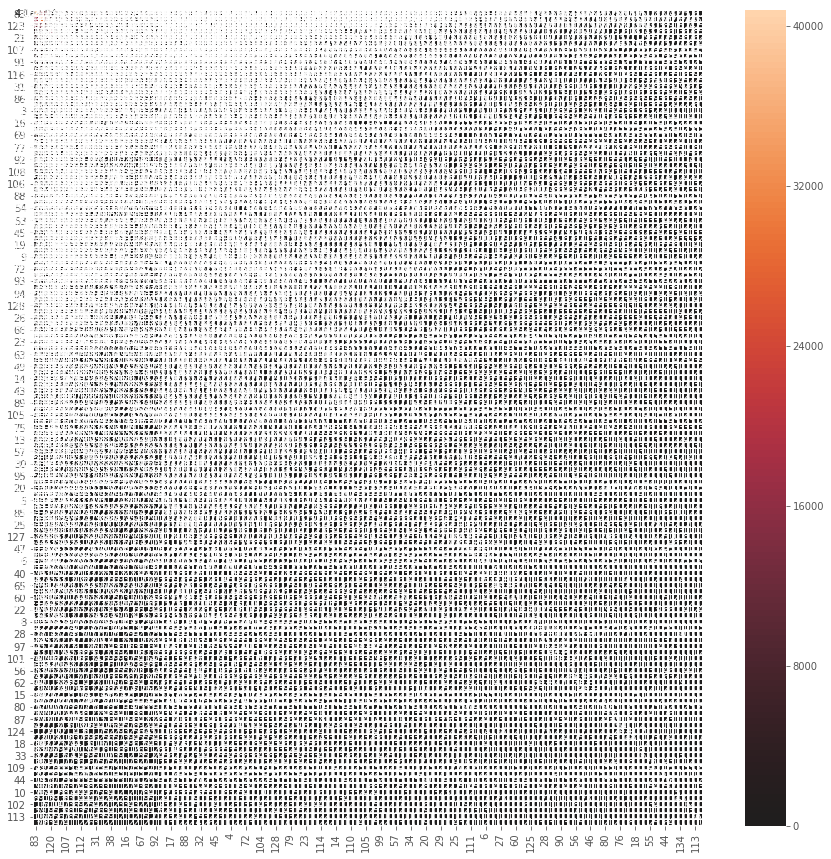

In [104]:
fig, ax = plt.subplots(figsize=(15,15))
sbn.heatmap(comp_df, ax=ax,vmin=0,center=0, annot=True, linewidths=.5)

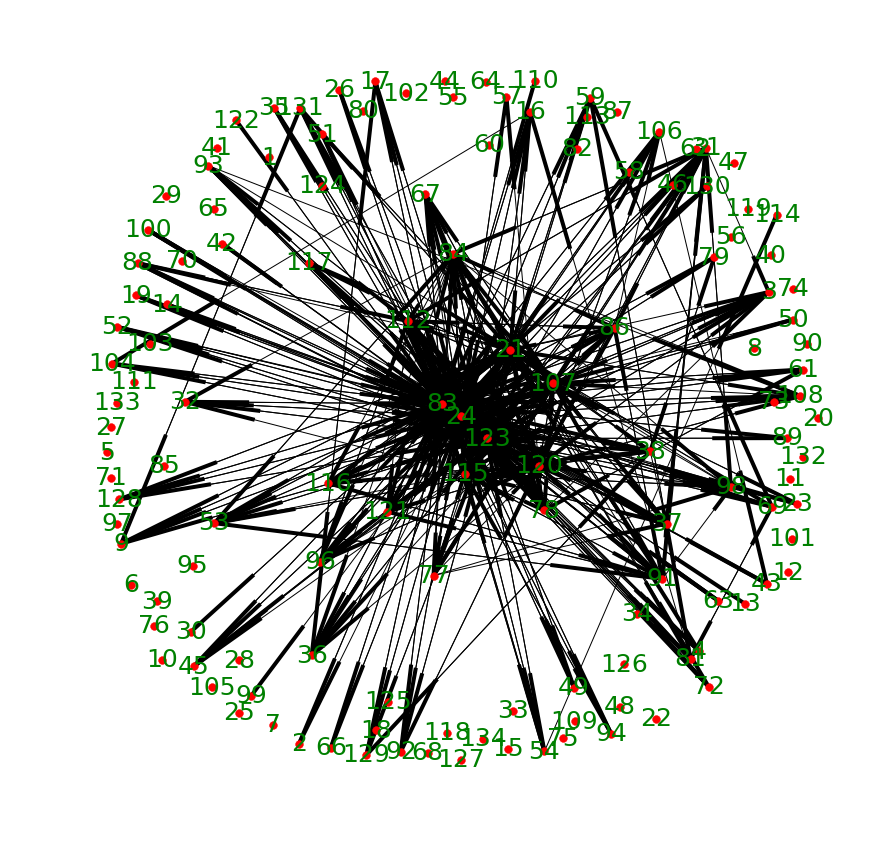

In [103]:
g = nx.DiGraph()
g.add_nodes_from(final.keys())

for rec in final:
    for a in final[rec]:
        if final[rec][a] > 300:
            g.add_edge(rec, a)
            
g.edges(data=True)
gfig, gax = plt.subplots(figsize=(15,15))
nx.draw(g,nx.spring_layout(g,k=1,iterations=30),ax=gax,with_labels=True,font_size=25,node_size=60,font_color='green')

In [ ]:
import pprint
bests = comp_df.values.tolist()[:10][:10]
for i in range(len(bests)):
    bests[i][i] = 0.0
pprint.pprint(bests[:10][:10], width=1400)

In [106]:
%load_ext py_d3

In [107]:

%%d3 4.11.0

<style>

.group-tick line {
  stroke: #000;
}

.ribbons {
  fill-opacity: 0.67;
}
</style>

<svg width=960 height=960></svg>

<script>
var matrix = [[0.0, 18209.0, 12087.0, 3147.0, 3687.0, 1720.0, 1592.0, 2032.0, 2034.0, 1789.0, 2188.0, 989.0, 1236.0, 948.0, 1856.0, 714.0, 689.0, 1297.0, 3634.0, 683.0, 1543.0, 1309.0, 565.0, 773.0, 530.0, 1769.0, 1058.0, 856.0, 1099.0, 815.0, 692.0, 1304.0, 499.0, 1007.0, 826.0, 1044.0, 473.0, 869.0, 1024.0, 555.0, 902.0, 325.0, 859.0, 465.0, 539.0, 1031.0, 418.0, 556.0, 798.0, 755.0, 378.0, 382.0, 850.0, 329.0, 264.0, 350.0, 792.0, 159.0, 828.0, 404.0, 680.0, 920.0, 416.0, 529.0, 414.0, 315.0, 232.0, 130.0, 160.0, 234.0, 274.0, 366.0, 228.0, 192.0, 404.0, 206.0, 282.0, 83.0, 112.0, 556.0, 290.0, 168.0, 103.0, 168.0, 162.0, 71.0, 59.0, 46.0, 105.0, 72.0, 107.0, 122.0, 70.0, 27.0, 80.0, 118.0, 63.0, 209.0, 44.0, 38.0, 61.0, 28.0, 41.0, 68.0, 55.0, 38.0, 36.0, 183.0, 48.0, 35.0, 46.0, 28.0, 111.0, 49.0, 25.0, 22.0, 28.0, 50.0, 20.0, 18.0, 50.0, 95.0, 51.0, 12.0, 18.0, 23.0, 12.0, 14.0, 32.0, 12.0, 15.0, 17.0, 6.0, 17.0],
 [16344.0, 0.0, 11124.0, 5329.0, 3058.0, 3256.0, 1900.0, 4412.0, 3045.0, 2304.0, 2114.0, 1287.0, 1992.0, 1257.0, 2372.0, 841.0, 1125.0, 1267.0, 1798.0, 1123.0, 782.0, 1169.0, 805.0, 1161.0, 713.0, 645.0, 928.0, 745.0, 846.0, 982.0, 910.0, 738.0, 622.0, 2428.0, 1118.0, 581.0, 569.0, 737.0, 729.0, 505.0, 531.0, 511.0, 539.0, 719.0, 773.0, 478.0, 605.0, 516.0, 631.0, 600.0, 570.0, 404.0, 420.0, 510.0, 503.0, 492.0, 392.0, 184.0, 424.0, 288.0, 367.0, 443.0, 309.0, 286.0, 243.0, 254.0, 229.0, 227.0, 169.0, 274.0, 313.0, 275.0, 315.0, 190.0, 208.0, 211.0, 215.0, 153.0, 139.0, 252.0, 138.0, 198.0, 130.0, 213.0, 121.0, 99.0, 62.0, 84.0, 137.0, 105.0, 97.0, 83.0, 64.0, 40.0, 102.0, 95.0, 59.0, 108.0, 35.0, 85.0, 109.0, 46.0, 41.0, 76.0, 45.0, 41.0, 22.0, 145.0, 63.0, 48.0, 31.0, 37.0, 70.0, 52.0, 18.0, 40.0, 49.0, 32.0, 44.0, 21.0, 95.0, 59.0, 45.0, 20.0, 33.0, 25.0, 20.0, 22.0, 23.0, 5.0, 24.0, 24.0, 25.0, 11.0],
 [11711.0, 12371.0, 0.0, 2312.0, 2131.0, 1285.0, 1131.0, 1448.0, 1323.0, 1040.0, 1523.0, 694.0, 945.0, 727.0, 1162.0, 528.0, 550.0, 901.0, 1031.0, 504.0, 560.0, 1095.0, 404.0, 574.0, 334.0, 565.0, 528.0, 364.0, 562.0, 547.0, 482.0, 430.0, 333.0, 1115.0, 521.0, 465.0, 302.0, 415.0, 425.0, 337.0, 455.0, 269.0, 379.0, 337.0, 378.0, 323.0, 272.0, 302.0, 394.0, 392.0, 268.0, 268.0, 281.0, 284.0, 269.0, 259.0, 292.0, 115.0, 382.0, 186.0, 285.0, 350.0, 205.0, 222.0, 313.0, 208.0, 150.0, 96.0, 117.0, 131.0, 204.0, 184.0, 174.0, 98.0, 151.0, 143.0, 130.0, 89.0, 84.0, 200.0, 108.0, 91.0, 75.0, 165.0, 96.0, 64.0, 27.0, 43.0, 85.0, 41.0, 46.0, 66.0, 35.0, 18.0, 60.0, 59.0, 35.0, 83.0, 35.0, 39.0, 57.0, 25.0, 20.0, 49.0, 27.0, 30.0, 16.0, 80.0, 33.0, 23.0, 21.0, 19.0, 50.0, 28.0, 26.0, 21.0, 26.0, 28.0, 19.0, 17.0, 39.0, 39.0, 24.0, 13.0, 11.0, 15.0, 8.0, 9.0, 10.0, 5.0, 12.0, 14.0, 12.0, 5.0],
 [3010.0, 5350.0, 2181.0, 0.0, 1397.0, 980.0, 714.0, 1933.0, 1108.0, 803.0, 590.0, 540.0, 789.0, 496.0, 776.0, 441.0, 510.0, 497.0, 297.0, 554.0, 274.0, 407.0, 311.0, 427.0, 370.0, 201.0, 444.0, 221.0, 313.0, 341.0, 310.0, 234.0, 244.0, 216.0, 473.0, 209.0, 226.0, 267.0, 167.0, 236.0, 189.0, 208.0, 177.0, 329.0, 340.0, 151.0, 226.0, 200.0, 187.0, 403.0, 242.0, 201.0, 136.0, 216.0, 191.0, 209.0, 135.0, 97.0, 142.0, 114.0, 133.0, 133.0, 116.0, 100.0, 72.0, 77.0, 85.0, 102.0, 80.0, 144.0, 108.0, 81.0, 257.0, 63.0, 61.0, 74.0, 66.0, 104.0, 50.0, 60.0, 45.0, 62.0, 44.0, 73.0, 58.0, 52.0, 32.0, 31.0, 43.0, 66.0, 47.0, 30.0, 31.0, 20.0, 55.0, 45.0, 24.0, 24.0, 29.0, 32.0, 27.0, 21.0, 16.0, 37.0, 18.0, 21.0, 12.0, 28.0, 19.0, 16.0, 14.0, 10.0, 19.0, 19.0, 11.0, 11.0, 9.0, 12.0, 6.0, 10.0, 18.0, 17.0, 14.0, 13.0, 12.0, 8.0, 6.0, 6.0, 1.0, 3.0, 6.0, 7.0, 8.0, 5.0],
 [3717.0, 3448.0, 2199.0, 1474.0, 0.0, 641.0, 825.0, 938.0, 588.0, 932.0, 486.0, 425.0, 410.0, 712.0, 732.0, 334.0, 296.0, 1237.0, 413.0, 373.0, 339.0, 448.0, 278.0, 303.0, 212.0, 420.0, 816.0, 249.0, 440.0, 313.0, 280.0, 389.0, 235.0, 285.0, 427.0, 524.0, 206.0, 359.0, 238.0, 298.0, 594.0, 211.0, 250.0, 276.0, 309.0, 203.0, 150.0, 238.0, 579.0, 171.0, 154.0, 197.0, 126.0, 160.0, 152.0, 178.0, 124.0, 78.0, 185.0, 190.0, 134.0, 149.0, 214.0, 175.0, 164.0, 131.0, 139.0, 82.0, 71.0, 125.0, 115.0, 262.0, 88.0, 72.0, 167.0, 98.0, 91.0, 73.0, 41.0, 112.0, 99.0, 50.0, 41.0, 78.0, 52.0, 36.0, 25.0, 20.0, 24.0, 50.0, 28.0, 62.0, 34.0, 21.0, 30.0, 68.0, 18.0, 49.0, 15.0, 39.0, 18.0, 20.0, 16.0, 10.0, 21.0, 21.0, 16.0, 19.0, 23.0, 13.0, 25.0, 11.0, 21.0, 18.0, 15.0, 10.0, 11.0, 15.0, 12.0, 17.0, 11.0, 12.0, 19.0, 6.0, 5.0, 7.0, 7.0, 9.0, 11.0, 9.0, 8.0, 7.0, 6.0, 2.0],
 [1547.0, 2897.0, 1110.0, 902.0, 570.0, 0.0, 580.0, 743.0, 613.0, 380.0, 256.0, 373.0, 677.0, 334.0, 389.0, 253.0, 344.0, 248.0, 152.0, 235.0, 159.0, 268.0, 935.0, 492.0, 139.0, 109.0, 190.0, 154.0, 188.0, 210.0, 196.0, 98.0, 350.0, 243.0, 278.0, 116.0, 249.0, 147.0, 152.0, 109.0, 115.0, 167.0, 145.0, 163.0, 160.0, 105.0, 301.0, 108.0, 93.0, 201.0, 265.0, 122.0, 77.0, 140.0, 171.0, 93.0, 63.0, 122.0, 84.0, 73.0, 57.0, 68.0, 74.0, 76.0, 63.0, 54.0, 45.0, 195.0, 101.0, 54.0, 73.0, 60.0, 60.0, 62.0, 30.0, 43.0, 54.0, 56.0, 58.0, 34.0, 33.0, 30.0, 58.0, 46.0, 55.0, 85.0, 38.0, 49.0, 30.0, 24.0, 33.0, 17.0, 35.0, 42.0, 30.0, 22.0, 34.0, 23.0, 29.0, 38.0, 25.0, 28.0, 15.0, 31.0, 15.0, 25.0, 12.0, 14.0, 32.0, 21.0, 26.0, 25.0, 12.0, 11.0, 18.0, 23.0, 24.0, 6.0, 45.0, 17.0, 20.0, 5.0, 14.0, 12.0, 12.0, 7.0, 15.0, 12.0, 12.0, 7.0, 2.0, 8.0, 7.0, 4.0],
 [1648.0, 2225.0, 1185.0, 882.0, 887.0, 696.0, 0.0, 529.0, 416.0, 501.0, 301.0, 496.0, 456.0, 811.0, 290.0, 336.0, 497.0, 379.0, 142.0, 417.0, 201.0, 1137.0, 457.0, 345.0, 141.0, 140.0, 308.0, 123.0, 237.0, 335.0, 218.0, 191.0, 202.0, 173.0, 226.0, 169.0, 456.0, 150.0, 124.0, 235.0, 150.0, 448.0, 173.0, 209.0, 198.0, 104.0, 192.0, 231.0, 217.0, 145.0, 187.0, 195.0, 118.0, 344.0, 349.0, 114.0, 92.0, 77.0, 70.0, 439.0, 65.0, 55.0, 126.0, 97.0, 104.0, 96.0, 102.0, 111.0, 61.0, 90.0, 98.0, 72.0, 85.0, 58.0, 61.0, 52.0, 41.0, 84.0, 41.0, 35.0, 42.0, 41.0, 42.0, 47.0, 44.0, 37.0, 32.0, 51.0, 28.0, 35.0, 25.0, 25.0, 20.0, 44.0, 20.0, 31.0, 33.0, 20.0, 19.0, 76.0, 42.0, 23.0, 19.0, 18.0, 21.0, 18.0, 9.0, 8.0, 16.0, 18.0, 16.0, 20.0, 13.0, 18.0, 19.0, 11.0, 8.0, 11.0, 21.0, 17.0, 22.0, 6.0, 6.0, 7.0, 9.0, 9.0, 4.0, 14.0, 5.0, 7.0, 6.0, 7.0, 4.0, 5.0],
 [1737.0, 3573.0, 1228.0, 1429.0, 842.0, 724.0, 428.0, 0.0, 735.0, 626.0, 287.0, 319.0, 556.0, 272.0, 835.0, 213.0, 231.0, 283.0, 163.0, 517.0, 183.0, 200.0, 309.0, 290.0, 184.0, 129.0, 286.0, 266.0, 220.0, 163.0, 196.0, 111.0, 182.0, 244.0, 578.0, 160.0, 142.0, 295.0, 113.0, 197.0, 114.0, 150.0, 118.0, 200.0, 220.0, 93.0, 157.0, 126.0, 120.0, 89.0, 163.0, 130.0, 67.0, 128.0, 76.0, 115.0, 57.0, 70.0, 90.0, 56.0, 73.0, 80.0, 86.0, 44.0, 58.0, 39.0, 96.0, 84.0, 77.0, 75.0, 76.0, 73.0, 68.0, 49.0, 22.0, 53.0, 38.0, 44.0, 36.0, 45.0, 42.0, 45.0, 31.0, 61.0, 21.0, 36.0, 25.0, 20.0, 19.0, 28.0, 31.0, 25.0, 30.0, 21.0, 23.0, 18.0, 19.0, 22.0, 20.0, 21.0, 27.0, 13.0, 10.0, 22.0, 16.0, 17.0, 8.0, 13.0, 24.0, 21.0, 14.0, 12.0, 9.0, 12.0, 12.0, 13.0, 7.0, 7.0, 12.0, 6.0, 13.0, 8.0, 4.0, 9.0, 6.0, 11.0, 9.0, 8.0, 4.0, 6.0, 7.0, 5.0, 3.0, 1.0],
 [1897.0, 2865.0, 1193.0, 965.0, 563.0, 633.0, 351.0, 939.0, 0.0, 390.0, 436.0, 336.0, 462.0, 214.0, 536.0, 179.0, 217.0, 226.0, 188.0, 425.0, 194.0, 245.0, 126.0, 253.0, 101.0, 155.0, 169.0, 237.0, 168.0, 200.0, 229.0, 133.0, 165.0, 117.0, 347.0, 113.0, 127.0, 175.0, 153.0, 93.0, 109.0, 111.0, 136.0, 150.0, 164.0, 130.0, 141.0, 97.0, 98.0, 138.0, 170.0, 97.0, 141.0, 85.0, 85.0, 163.0, 94.0, 51.0, 69.0, 48.0, 133.0, 74.0, 50.0, 60.0, 49.0, 95.0, 50.0, 53.0, 38.0, 45.0, 46.0, 42.0, 101.0, 49.0, 30.0, 34.0, 38.0, 32.0, 35.0, 33.0, 24.0, 52.0, 23.0, 36.0, 40.0, 24.0, 15.0, 12.0, 34.0, 31.0, 52.0, 17.0, 19.0, 10.0, 45.0, 45.0, 15.0, 11.0, 14.0, 20.0, 24.0, 10.0, 12.0, 26.0, 12.0, 16.0, 11.0, 13.0, 10.0, 9.0, 5.0, 9.0, 19.0, 8.0, 6.0, 9.0, 4.0, 13.0, 2.0, 5.0, 12.0, 15.0, 6.0, 5.0, 6.0, 5.0, 4.0, 6.0, 4.0, 3.0, 2.0, 0.0, 2.0, 3.0],
 [1605.0, 2391.0, 1007.0, 784.0, 761.0, 481.0, 447.0, 908.0, 450.0, 0.0, 268.0, 299.0, 382.0, 307.0, 569.0, 244.0, 190.0, 560.0, 173.0, 296.0, 168.0, 253.0, 244.0, 197.0, 135.0, 105.0, 219.0, 142.0, 273.0, 119.0, 356.0, 136.0, 184.0, 175.0, 238.0, 153.0, 124.0, 215.0, 118.0, 121.0, 156.0, 136.0, 163.0, 178.0, 322.0, 89.0, 106.0, 162.0, 177.0, 88.0, 150.0, 111.0, 69.0, 81.0, 97.0, 99.0, 78.0, 53.0, 68.0, 60.0, 78.0, 73.0, 108.0, 75.0, 64.0, 67.0, 77.0, 75.0, 49.0, 74.0, 84.0, 79.0, 66.0, 47.0, 32.0, 45.0, 63.0, 46.0, 28.0, 35.0, 36.0, 36.0, 19.0, 55.0, 26.0, 29.0, 22.0, 15.0, 14.0, 30.0, 24.0, 28.0, 15.0, 22.0, 18.0, 67.0, 26.0, 21.0, 12.0, 16.0, 19.0, 12.0, 6.0, 12.0, 6.0, 14.0, 7.0, 11.0, 14.0, 15.0, 12.0, 7.0, 24.0, 9.0, 8.0, 12.0, 6.0, 14.0, 11.0, 7.0, 7.0, 10.0, 7.0, 6.0, 6.0, 10.0, 4.0, 11.0, 6.0, 9.0, 4.0, 2.0, 4.0, 1.0]]

;

var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height"),
    outerRadius = Math.min(width, height) * 0.5 - 40,
    innerRadius = outerRadius - 30;

var formatValue = d3.formatPrefix(",.0", 1e3);

var chord = d3.chord()
    .padAngle(0.05)
    .sortSubgroups(d3.descending);

var arc = d3.arc()
    .innerRadius(innerRadius)
    .outerRadius(outerRadius);

var ribbon = d3.ribbon()
    .radius(innerRadius);

var color = d3.scaleOrdinal()
    .domain(d3.range(4))
    .range(["#000000", "#FFDD89", "#957244", "#F26223"]);

var g = svg.append("g")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")")
    .datum(chord(matrix));

var group = g.append("g")
    .attr("class", "groups")
  .selectAll("g")
  .data(function(chords) { return chords.groups; })
  .enter().append("g");

group.append("path")
    .style("fill", function(d) { return color(d.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.index)).darker(); })
    .attr("d", arc);

var groupTick = group.selectAll(".group-tick")
  .data(function(d) { return groupTicks(d, 1e3); })
  .enter().append("g")
    .attr("class", "group-tick")
    .attr("transform", function(d) { return "rotate(" + (d.angle * 180 / Math.PI - 90) + ") translate(" + outerRadius + ",0)"; });

groupTick.append("line")
    .attr("x2", 6);

groupTick
  .filter(function(d) { return d.value % 5e3 === 0; })
  .append("text")
    .attr("x", 8)
    .attr("dy", ".35em")
    .attr("transform", function(d) { return d.angle > Math.PI ? "rotate(180) translate(-16)" : null; })
    .style("text-anchor", function(d) { return d.angle > Math.PI ? "end" : null; })
    .text(function(d) { return formatValue(d.value); });

g.append("g")
    .attr("class", "ribbons")
  .selectAll("path")
  .data(function(chords) { return chords; })
  .enter().append("path")
    .attr("d", ribbon)
    .style("fill", function(d) { return color(d.target.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.target.index)).darker(); });

// Returns an array of tick angles and values for a given group and step.
function groupTicks(d, step) {
  var k = (d.endAngle - d.startAngle) / d.value;
  return d3.range(0, d.value, step).map(function(value) {
    return {value: value, angle: value * k + d.startAngle};
  });
}

</script>